# Linear Algebra Fundamentals for Machine Learning

This notebook covers the essential linear algebra concepts needed for ML/AI:
1. **Vectors**: Operations, dot product, cross product, norms
2. **Matrices**: Multiplication, transpose, inverse, determinant
3. **Eigenvalues/Eigenvectors**: Principal components, dimensionality reduction
4. **Vector Spaces**: Basis, linear independence, span

## Why Linear Algebra Matters in ML
- **90% of ML algorithms** rely on matrix operations
- **Data representation**: Images, text, features are all vectors/matrices
- **Transformations**: Rotations, scaling, projections
- **Dimensionality reduction**: PCA, SVD
- **Neural networks**: Weight matrices, forward/backward propagation

In [1]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

📚 Libraries imported successfully!
NumPy version: 2.1.3


# 1. Vectors: The Building Blocks

## What is a Vector?
A vector is an ordered list of numbers that represents:
- **Geometric**: Direction and magnitude in space
- **Algebraic**: A point in n-dimensional space
- **ML Context**: Features of a data point

### Vector Representation
$$\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Column vectors:
v1 = 
[[3]
 [4]]
v2 = 
[[1]
 [2]]

Row vectors:
v1 = [3 4]
v2 = [1 2]


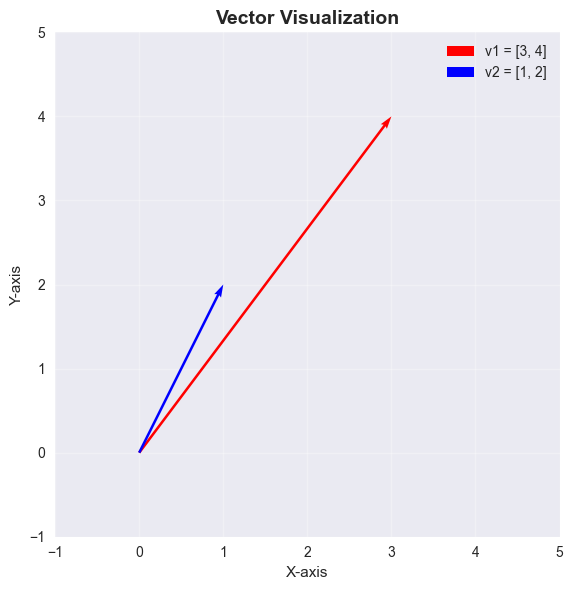

In [2]:
# Creating vectors in NumPy
# Column vector (most common in ML)
v1 = np.array([[3], [4]])  # 2D vector
v2 = np.array([[1], [2]]) 

# Row vector
v1_row = np.array([3, 4])
v2_row = np.array([1, 2])

print("Column vectors:")
print(f"v1 = \n{v1}")
print(f"v2 = \n{v2}")

print("\nRow vectors:")
print(f"v1 = {v1_row}")
print(f"v2 = {v2_row}")

# Visualizing vectors
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vectors from origin
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='v2 = [1, 2]')

# Add grid and formatting
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.tight_layout()
plt.show()

## Vector Operations

### 1. Vector Addition
$$\vec{u} + \vec{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$

**Geometric Interpretation**: Placing vectors head-to-tail

v1 + v2 = [3 4] + [1 2] = [4 6]


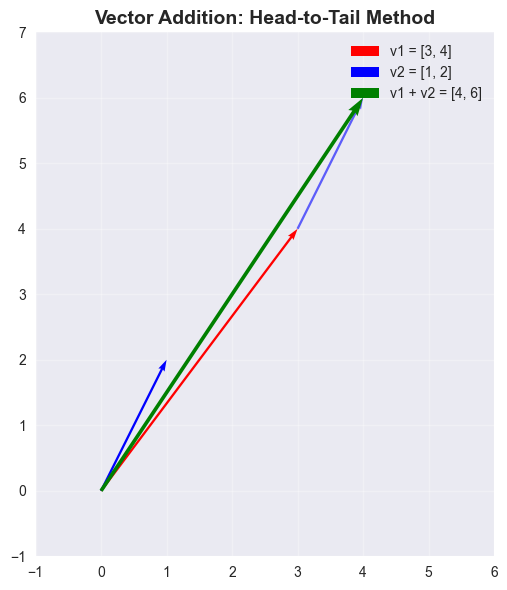

In [3]:
# Vector addition
v_sum = v1_row + v2_row
print(f"v1 + v2 = {v1_row} + {v2_row} = {v_sum}")

# Visualize vector addition
fig, ax = plt.subplots(figsize=(10, 6))

# Original vectors
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, label='v2 = [1, 2]')

# Vector addition (head-to-tail)
ax.quiver(v1_row[0], v1_row[1], v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, alpha=0.6, linestyle='--')

# Resultant vector
ax.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, 
          color='green', width=0.008, label=f'v1 + v2 = [{v_sum[0]}, {v_sum[1]}]')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Addition: Head-to-Tail Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Scalar Multiplication
$$c \cdot \vec{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \\ \vdots \\ c \cdot v_n \end{bmatrix}$$

**Geometric Interpretation**: Scaling the vector (magnitude) without changing direction

2.5 * v1 = 2.5 * [3 4] = [ 7.5 10. ]


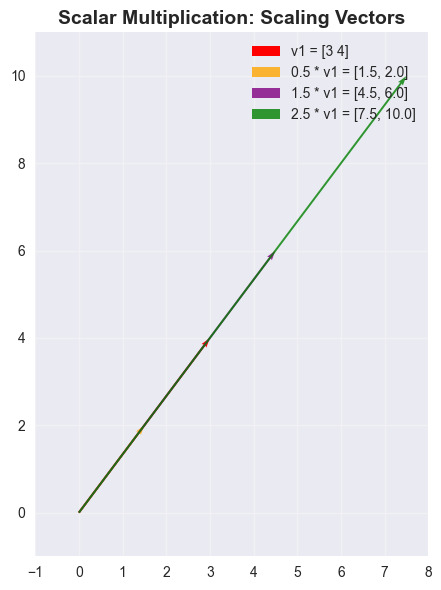

In [4]:
# Scalar multiplication
scalar = 2.5
v_scaled = scalar * v1_row
print(f"{scalar} * v1 = {scalar} * {v1_row} = {v_scaled}")

# Visualize scalar multiplication
fig, ax = plt.subplots(figsize=(10, 6))

# Original vector
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label=f'v1 = {v1_row}')

# Scaled vectors
for s, color in [(0.5, 'orange'), (1.5, 'purple'), (2.5, 'green')]:
    v_s = s * v1_row
    ax.quiver(0, 0, v_s[0], v_s[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.005, alpha=0.8, label=f'{s} * v1 = [{v_s[0]:.1f}, {v_s[1]:.1f}]')

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Scalar Multiplication: Scaling Vectors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Dot Product (Inner Product)
$$\vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n = |\vec{u}||\vec{v}|\cos(\theta)$$

**Key Properties**:
- Returns a **scalar** (not a vector)
- Measures **similarity** between vectors
- Related to the **angle** between vectors
- **Zero** when vectors are perpendicular

v1 · v2 = [3 4] · [1 2] = 3*1 + 4*2 = 11

Magnitudes:
|v1| = 5.000
|v2| = 2.236

Angle between vectors: 10.30°


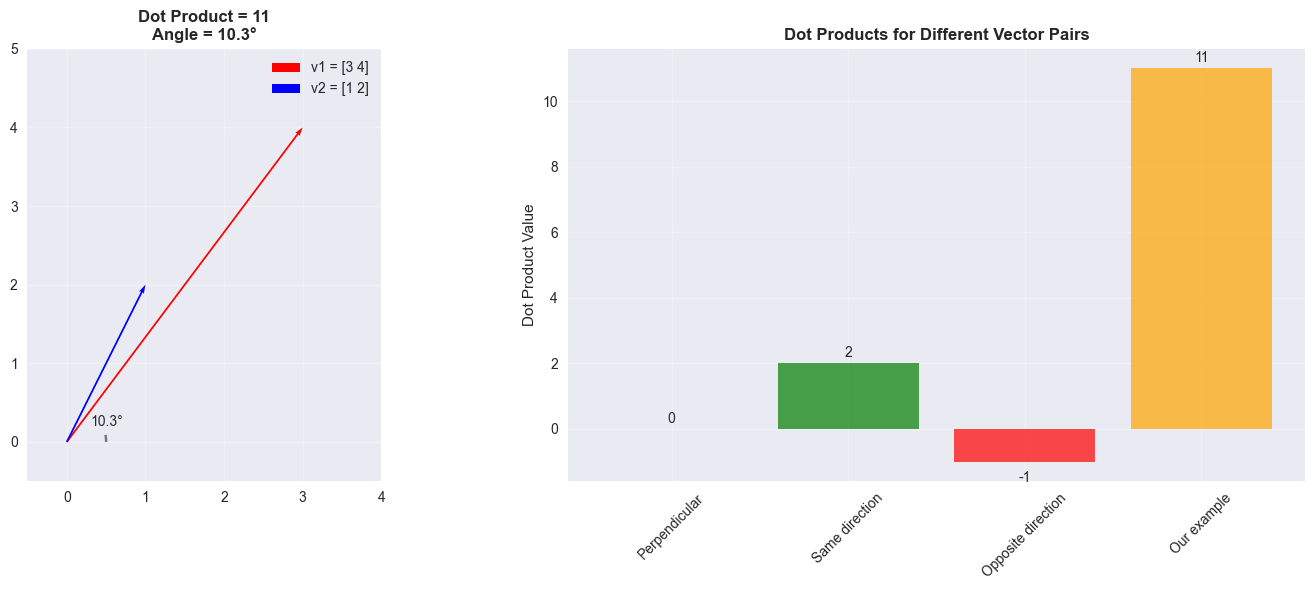

In [5]:
# Dot product calculation
dot_product = np.dot(v1_row, v2_row)
print(f"v1 · v2 = {v1_row} · {v2_row} = {v1_row[0]}*{v2_row[0]} + {v1_row[1]}*{v2_row[1]} = {dot_product}")

# Calculate angle between vectors
magnitude_v1 = np.linalg.norm(v1_row)
magnitude_v2 = np.linalg.norm(v2_row)
cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
angle_radians = np.arccos(cos_theta)
angle_degrees = np.degrees(angle_radians)

print(f"\nMagnitudes:")
print(f"|v1| = {magnitude_v1:.3f}")
print(f"|v2| = {magnitude_v2:.3f}")
print(f"\nAngle between vectors: {angle_degrees:.2f}°")

# Visualize dot product interpretation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Vectors and angle
ax1.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label=f'v1 = {v1_row}')
ax1.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.005, label=f'v2 = {v2_row}')

# Draw angle arc
theta_range = np.linspace(0, angle_radians, 50)
arc_x = 0.5 * np.cos(theta_range)
arc_y = 0.5 * np.sin(theta_range)
ax1.plot(arc_x, arc_y, 'k--', alpha=0.5)
ax1.text(0.3, 0.2, f'{angle_degrees:.1f}°', fontsize=10)

ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 5)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title(f'Dot Product = {dot_product}\nAngle = {angle_degrees:.1f}°', fontweight='bold')

# Right plot: Different vector pairs and their dot products
test_vectors = [
    ([1, 0], [0, 1], 'Perpendicular'),
    ([1, 1], [1, 1], 'Same direction'),
    ([1, 0], [-1, 0], 'Opposite direction'),
    ([3, 4], [1, 2], 'Our example')
]

colors = ['purple', 'green', 'red', 'orange']
dot_products = []
labels = []

for i, (u, v, desc) in enumerate(test_vectors):
    dot = np.dot(u, v)
    dot_products.append(dot)
    labels.append(f'{desc}\n{u}·{v}={dot}')

bars = ax2.bar(range(len(dot_products)), dot_products, color=colors, alpha=0.7)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels([label.split('\n')[0] for label in labels], rotation=45)
ax2.set_ylabel('Dot Product Value')
ax2.set_title('Dot Products for Different Vector Pairs', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, dp in zip(bars, dot_products):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height >= 0 else height - 0.3,
             f'{dp}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

### 4. Cross Product (3D Only)
$$\vec{u} \times \vec{v} = \begin{bmatrix} u_2v_3 - u_3v_2 \\ u_3v_1 - u_1v_3 \\ u_1v_2 - u_2v_1 \end{bmatrix}$$

**Key Properties**:
- Returns a **vector** perpendicular to both input vectors
- Magnitude = area of parallelogram formed by the vectors
- Direction follows **right-hand rule**

u = [1 2 3]
v = [4 5 6]
u × v = [-3  6 -3]

Verifying perpendicularity:
u · (u × v) = 0 (should be 0)
v · (u × v) = 0 (should be 0)


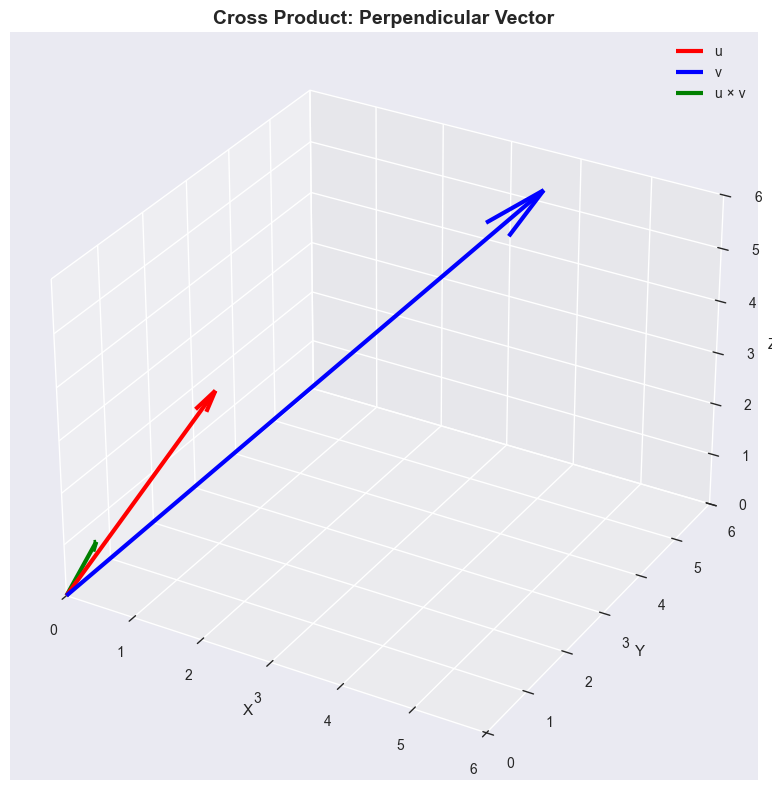

In [6]:
# Cross product in 3D
u_3d = np.array([1, 2, 3])
v_3d = np.array([4, 5, 6])

cross_product = np.cross(u_3d, v_3d)
print(f"u = {u_3d}")
print(f"v = {v_3d}")
print(f"u × v = {cross_product}")

# Verify perpendicularity
dot_u_cross = np.dot(u_3d, cross_product)
dot_v_cross = np.dot(v_3d, cross_product)
print(f"\nVerifying perpendicularity:")
print(f"u · (u × v) = {dot_u_cross} (should be 0)")
print(f"v · (u × v) = {dot_v_cross} (should be 0)")

# 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original vectors
ax.quiver(0, 0, 0, u_3d[0], u_3d[1], u_3d[2], color='red', arrow_length_ratio=0.1, label='u', linewidth=3)
ax.quiver(0, 0, 0, v_3d[0], v_3d[1], v_3d[2], color='blue', arrow_length_ratio=0.1, label='v', linewidth=3)

# Plot cross product (scaled for visibility)
cross_scaled = cross_product / np.linalg.norm(cross_product) * 3
ax.quiver(0, 0, 0, cross_scaled[0], cross_scaled[1], cross_scaled[2], 
          color='green', arrow_length_ratio=0.1, label='u × v', linewidth=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Cross Product: Perpendicular Vector', fontsize=14, fontweight='bold')

# Set equal aspect ratio
max_range = 6
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])

plt.tight_layout()
plt.show()

### 5. Vector Norms (Magnitude)

#### L2 Norm (Euclidean Norm)
$$||\vec{v}||_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$$

#### L1 Norm (Manhattan Norm)
$$||\vec{v}||_1 = |v_1| + |v_2| + \cdots + |v_n|$$

#### L∞ Norm (Maximum Norm)
$$||\vec{v}||_\infty = \max(|v_1|, |v_2|, \ldots, |v_n|)$$

Vector v = [3 4]
L2 norm (Euclidean): ||v||₂ = 5.000
L1 norm (Manhattan):  ||v||₁ = 7.000
L∞ norm (Maximum):   ||v||∞ = 4.000


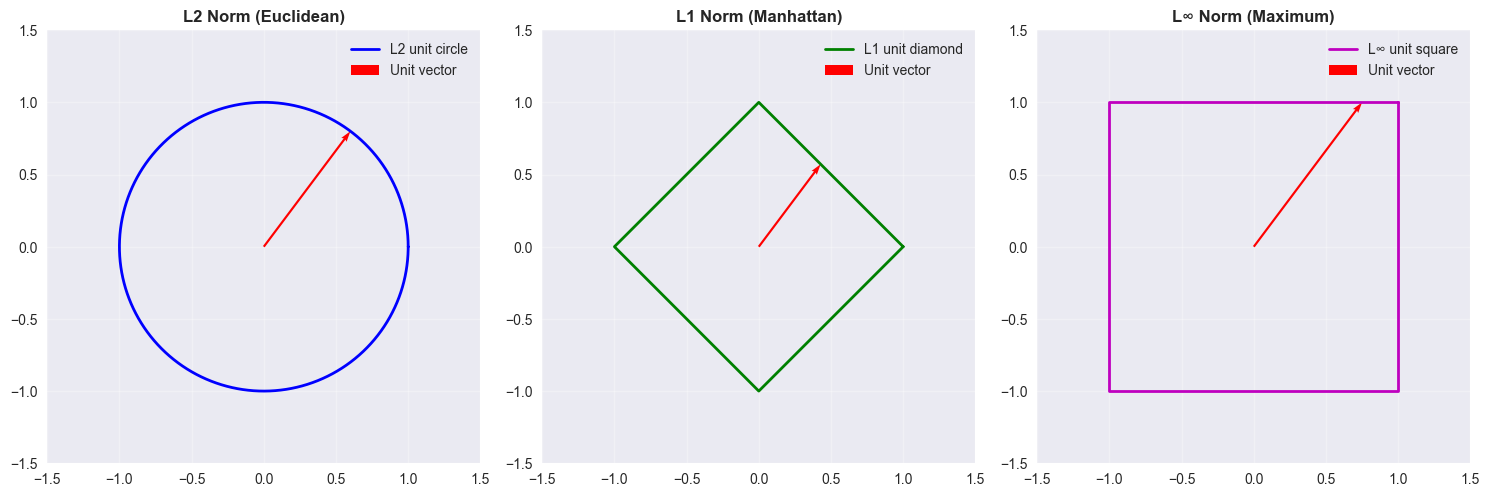

In [7]:
# Vector norms
v = np.array([3, 4])

# Different norms
l2_norm = np.linalg.norm(v, 2)  # or just np.linalg.norm(v)
l1_norm = np.linalg.norm(v, 1)
linf_norm = np.linalg.norm(v, np.inf)

print(f"Vector v = {v}")
print(f"L2 norm (Euclidean): ||v||₂ = {l2_norm:.3f}")
print(f"L1 norm (Manhattan):  ||v||₁ = {l1_norm:.3f}")
print(f"L∞ norm (Maximum):   ||v||∞ = {linf_norm:.3f}")

# Visualize different norms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create unit circles for different norms
theta = np.linspace(0, 2*np.pi, 1000)

# L2 norm (circle)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)
axes[0].plot(x_l2, y_l2, 'b-', linewidth=2, label='L2 unit circle')
axes[0].quiver(0, 0, v[0]/l2_norm, v[1]/l2_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[0].set_title('L2 Norm (Euclidean)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].legend()

# L1 norm (diamond)
x_l1 = np.array([1, 0, -1, 0, 1])
y_l1 = np.array([0, 1, 0, -1, 0])
axes[1].plot(x_l1, y_l1, 'g-', linewidth=2, label='L1 unit diamond')
axes[1].quiver(0, 0, v[0]/l1_norm, v[1]/l1_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[1].set_title('L1 Norm (Manhattan)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].legend()

# L∞ norm (square)
x_linf = np.array([1, 1, -1, -1, 1])
y_linf = np.array([1, -1, -1, 1, 1])
axes[2].plot(x_linf, y_linf, 'm-', linewidth=2, label='L∞ unit square')
axes[2].quiver(0, 0, v[0]/linf_norm, v[1]/linf_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[2].set_title('L∞ Norm (Maximum)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].legend()

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# 2. Matrices: The Powerhouse of ML

## What is a Matrix?
A matrix is a rectangular array of numbers arranged in rows and columns:
$$A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix}$$

**ML Context**: 
- **Data matrix**: Each row = sample, each column = feature
- **Weight matrix**: Neural network parameters
- **Transformation matrix**: Rotations, scaling, projections

In [8]:
# Creating matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print("Matrix A (2×3):")
print(A)
print(f"Shape: {A.shape}")

print("\nMatrix B (3×2):")
print(B)
print(f"Shape: {B.shape}")

# Special matrices
I = np.eye(3)  # Identity matrix
Z = np.zeros((2, 3))  # Zero matrix
O = np.ones((3, 2))  # Ones matrix

print("\nSpecial Matrices:")
print(f"Identity (3×3):\n{I}")
print(f"\nZeros (2×3):\n{Z}")
print(f"\nOnes (3×2):\n{O}")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]
Shape: (3, 2)

Special Matrices:
Identity (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zeros (2×3):
[[0. 0. 0.]
 [0. 0. 0.]]

Ones (3×2):
[[1. 1.]
 [1. 1.]
 [1. 1.]]


## Matrix Operations

### 1. Matrix Addition and Subtraction
Only possible when matrices have the same dimensions:
$$C = A + B \quad \text{where} \quad c_{ij} = a_{ij} + b_{ij}$$

In [9]:
# Matrix addition/subtraction (same dimensions)
M1 = np.array([[1, 2], [3, 4]])
M2 = np.array([[5, 6], [7, 8]])

M_sum = M1 + M2
M_diff = M1 - M2

print("Matrix Addition:")
print(f"M1 =\n{M1}")
print(f"\nM2 =\n{M2}")
print(f"\nM1 + M2 =\n{M_sum}")
print(f"\nM1 - M2 =\n{M_diff}")

Matrix Addition:
M1 =
[[1 2]
 [3 4]]

M2 =
[[5 6]
 [7 8]]

M1 + M2 =
[[ 6  8]
 [10 12]]

M1 - M2 =
[[-4 -4]
 [-4 -4]]


### 2. Matrix Multiplication
**Rule**: (m×n) × (n×p) = (m×p)

$$C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}$$

**Key Points**:
- Inner dimensions must match
- **Not commutative**: AB ≠ BA (usually)
- **Associative**: (AB)C = A(BC)

In [10]:
# Matrix multiplication
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2×3

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])   # 3×2

# A × B is valid (2×3) × (3×2) = (2×2)
AB = np.dot(A, B)  # or A @ B

print("Matrix Multiplication:")
print(f"A (2×3) =\n{A}")
print(f"\nB (3×2) =\n{B}")
print(f"\nA × B (2×2) =\n{AB}")

# Verify manual calculation for first element
manual_calc = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]
print(f"\nManual calculation of AB[0,0]: {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} + {A[0,2]}×{B[2,0]} = {manual_calc}")

# Demonstrate non-commutativity
print("\n" + "="*50)
print("DEMONSTRATING NON-COMMUTATIVITY")
print("="*50)

# Create square matrices for comparison
X = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])

XY = X @ Y
YX = Y @ X

print(f"X =\n{X}")
print(f"\nY =\n{Y}")
print(f"\nX × Y =\n{XY}")
print(f"\nY × X =\n{YX}")
print(f"\nAre they equal? {np.array_equal(XY, YX)}")

Matrix Multiplication:
A (2×3) =
[[1 2 3]
 [4 5 6]]

B (3×2) =
[[ 7  8]
 [ 9 10]
 [11 12]]

A × B (2×2) =
[[ 58  64]
 [139 154]]

Manual calculation of AB[0,0]: 1×7 + 2×9 + 3×11 = 58

DEMONSTRATING NON-COMMUTATIVITY
X =
[[1 2]
 [3 4]]

Y =
[[5 6]
 [7 8]]

X × Y =
[[19 22]
 [43 50]]

Y × X =
[[23 34]
 [31 46]]

Are they equal? False


### 3. Matrix Transpose
**Definition**: Flip matrix over its diagonal
$$A^T_{ij} = A_{ji}$$

**Properties**:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$
- $(AB)^T = B^T A^T$

Matrix Transpose:
A (2×3) =
[[1 2 3]
 [4 5 6]]

A^T (3×2) =
[[1 4]
 [2 5]
 [3 6]]

Verifying Properties:
(A^T)^T = A? True
(BC)^T = C^T B^T? True


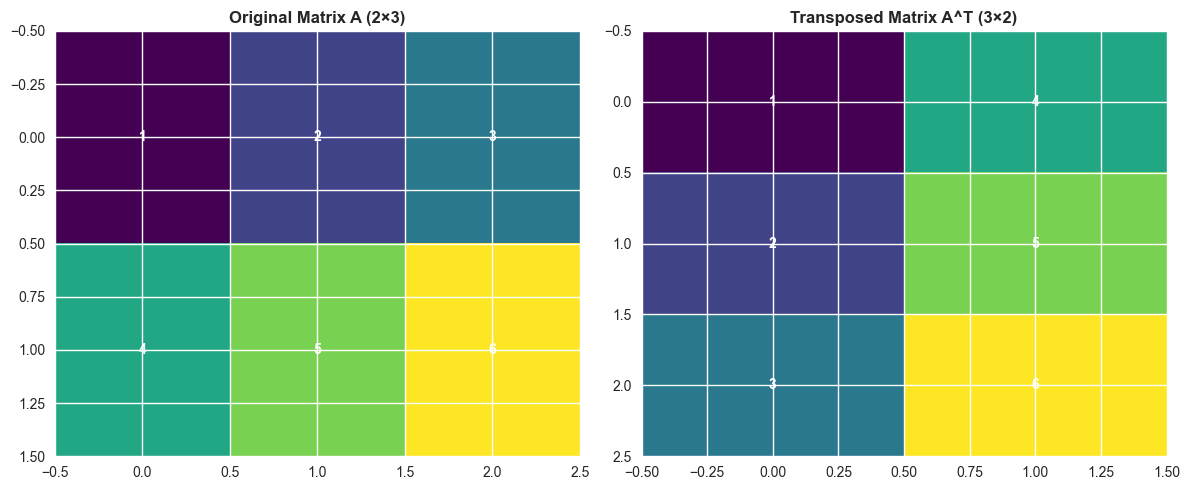

In [11]:
# Matrix transpose
A = np.array([[1, 2, 3],
              [4, 5, 6]])

A_T = A.T  # or np.transpose(A)

print("Matrix Transpose:")
print(f"A (2×3) =\n{A}")
print(f"\nA^T (3×2) =\n{A_T}")

# Verify properties
print("\nVerifying Properties:")
print(f"(A^T)^T = A? {np.array_equal((A.T).T, A)}")

# For square matrices
B = np.array([[1, 2], [3, 4]])
C = np.array([[5, 6], [7, 8]])

BC = B @ C
BC_T = BC.T
CT_BT = C.T @ B.T

print(f"(BC)^T = C^T B^T? {np.array_equal(BC_T, CT_BT)}")

# Visualize transpose operation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original matrix
im1 = ax1.imshow(A, cmap='viridis', aspect='auto')
ax1.set_title('Original Matrix A (2×3)', fontweight='bold')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax1.text(j, i, str(A[i, j]), ha='center', va='center', color='white', fontweight='bold')

# Transposed matrix
im2 = ax2.imshow(A_T, cmap='viridis', aspect='auto')
ax2.set_title('Transposed Matrix A^T (3×2)', fontweight='bold')
for i in range(A_T.shape[0]):
    for j in range(A_T.shape[1]):
        ax2.text(j, i, str(A_T[i, j]), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Matrix Inverse
**Definition**: For square matrix A, if A⁻¹ exists:
$$A \cdot A^{-1} = A^{-1} \cdot A = I$$

**Conditions for Existence**:
- Matrix must be **square**
- Matrix must be **non-singular** (det(A) ≠ 0)

**ML Applications**: Solving linear equations, pseudo-inverse for regression

In [12]:
# Matrix inverse
A = np.array([[2, 1],
              [1, 1]], dtype=float)

# Check if matrix is invertible (determinant ≠ 0)
det_A = np.linalg.det(A)
print(f"Matrix A =\n{A}")
print(f"\nDeterminant of A: {det_A:.3f}")

if abs(det_A) > 1e-10:  # Check for numerical stability
    A_inv = np.linalg.inv(A)
    print(f"\nA^(-1) =\n{A_inv}")
    
    # Verify A * A^(-1) = I
    identity_check = A @ A_inv
    print(f"\nA × A^(-1) =\n{identity_check}")
    print(f"\nIs it identity? {np.allclose(identity_check, np.eye(2))}")
    
    # Solve linear system Ax = b using inverse
    b = np.array([5, 3])
    x_inv = A_inv @ b
    x_solve = np.linalg.solve(A, b)  # More numerically stable
    
    print(f"\nSolving Ax = b where b = {b}:")
    print(f"Using inverse: x = {x_inv}")
    print(f"Using solve:   x = {x_solve}")
    print(f"Verification Ax = {A @ x_solve}")
else:
    print("\nMatrix is singular (not invertible)!")

# Example of singular matrix
print("\n" + "="*40)
print("EXAMPLE OF SINGULAR MATRIX")
print("="*40)

singular_matrix = np.array([[1, 2],
                           [2, 4]])
det_singular = np.linalg.det(singular_matrix)
print(f"Singular matrix =\n{singular_matrix}")
print(f"Determinant: {det_singular:.3f}")
print("This matrix is not invertible because its rows are linearly dependent.")

Matrix A =
[[2. 1.]
 [1. 1.]]

Determinant of A: 1.000

A^(-1) =
[[ 1. -1.]
 [-1.  2.]]

A × A^(-1) =
[[1. 0.]
 [0. 1.]]

Is it identity? True

Solving Ax = b where b = [5 3]:
Using inverse: x = [2. 1.]
Using solve:   x = [2. 1.]
Verification Ax = [5. 3.]

EXAMPLE OF SINGULAR MATRIX
Singular matrix =
[[1 2]
 [2 4]]
Determinant: 0.000
This matrix is not invertible because its rows are linearly dependent.


### 5. Determinant
**Definition**: A scalar value that characterizes the matrix

**2×2 Matrix**:
$$\det(A) = \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc$$

**Geometric Interpretation**:
- **Area scaling factor** for 2D transformations
- **Volume scaling factor** for 3D transformations
- **Zero determinant** = matrix collapses space to lower dimension

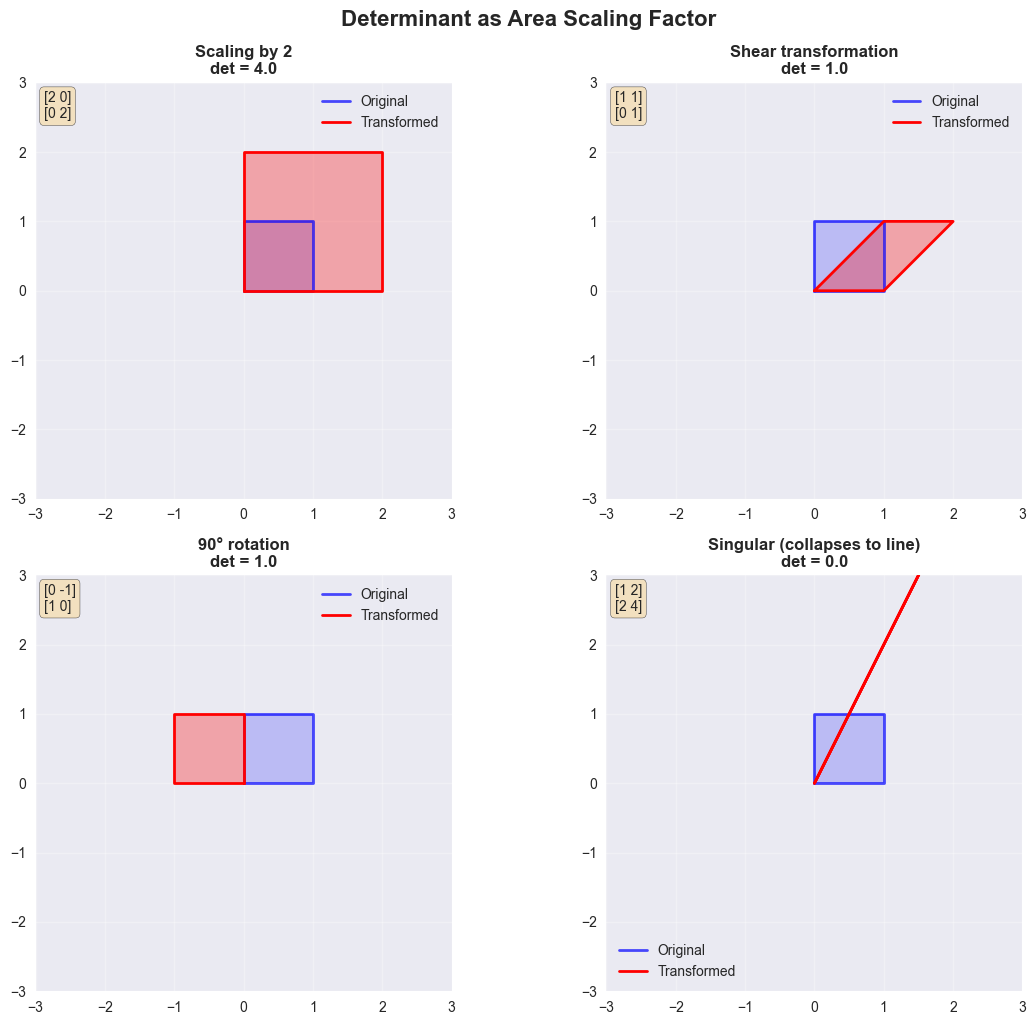

Determinant Properties:
det(A) = 5.000
det(B) = -5.000
det(AB) = -25.000
det(A) × det(B) = -25.000
det(A^T) = 5.000

Property checks:
det(AB) = det(A) × det(B)? True
det(A^T) = det(A)? True


In [13]:
# Determinant and its geometric interpretation
matrices = [
    (np.array([[2, 0], [0, 2]]), "Scaling by 2"),
    (np.array([[1, 1], [0, 1]]), "Shear transformation"),
    (np.array([[0, -1], [1, 0]]), "90° rotation"),
    (np.array([[1, 2], [2, 4]]), "Singular (collapses to line)")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Unit square vertices
unit_square = np.array([[0, 1, 1, 0, 0],
                       [0, 0, 1, 1, 0]])

for i, (matrix, title) in enumerate(matrices):
    # Transform unit square
    transformed = matrix @ unit_square
    
    # Calculate determinant
    det = np.linalg.det(matrix)
    
    # Plot
    axes[i].plot(unit_square[0], unit_square[1], 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[i].fill(unit_square[0], unit_square[1], 'blue', alpha=0.2)
    
    axes[i].plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')
    axes[i].fill(transformed[0], transformed[1], 'red', alpha=0.3)
    
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_aspect('equal')
    axes[i].legend()
    axes[i].set_title(f'{title}\ndet = {det:.1f}', fontweight='bold')
    
    # Add matrix text
    matrix_str = f'[{matrix[0,0]:.0f} {matrix[0,1]:.0f}]\n[{matrix[1,0]:.0f} {matrix[1,1]:.0f}]'
    axes[i].text(0.02, 0.98, matrix_str, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.suptitle('Determinant as Area Scaling Factor', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Properties of determinant
print("Determinant Properties:")
A = np.array([[2, 3], [1, 4]])
B = np.array([[1, 2], [3, 1]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_AB = np.linalg.det(A @ B)
det_AT = np.linalg.det(A.T)

print(f"det(A) = {det_A:.3f}")
print(f"det(B) = {det_B:.3f}")
print(f"det(AB) = {det_AB:.3f}")
print(f"det(A) × det(B) = {det_A * det_B:.3f}")
print(f"det(A^T) = {det_AT:.3f}")
print(f"\nProperty checks:")
print(f"det(AB) = det(A) × det(B)? {np.isclose(det_AB, det_A * det_B)}")
print(f"det(A^T) = det(A)? {np.isclose(det_AT, det_A)}")

# Linear Algebra Fundamentals for Machine Learning

This notebook covers the essential linear algebra concepts needed for ML/AI:
1. **Vectors**: Operations, dot product, cross product, norms
2. **Matrices**: Multiplication, transpose, inverse, determinant
3. **Eigenvalues/Eigenvectors**: Principal components, dimensionality reduction
4. **Vector Spaces**: Basis, linear independence, span

## Why Linear Algebra Matters in ML
- **90% of ML algorithms** rely on matrix operations
- **Data representation**: Images, text, features are all vectors/matrices
- **Transformations**: Rotations, scaling, projections
- **Dimensionality reduction**: PCA, SVD
- **Neural networks**: Weight matrices, forward/backward propagation

In [14]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

📚 Libraries imported successfully!
NumPy version: 2.1.3


# 1. Vectors: The Building Blocks

## What is a Vector?
A vector is an ordered list of numbers that represents:
- **Geometric**: Direction and magnitude in space
- **Algebraic**: A point in n-dimensional space
- **ML Context**: Features of a data point

### Vector Representation
$$\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Column vectors:
v1 = 
[[3]
 [4]]
v2 = 
[[1]
 [2]]

Row vectors:
v1 = [3 4]
v2 = [1 2]


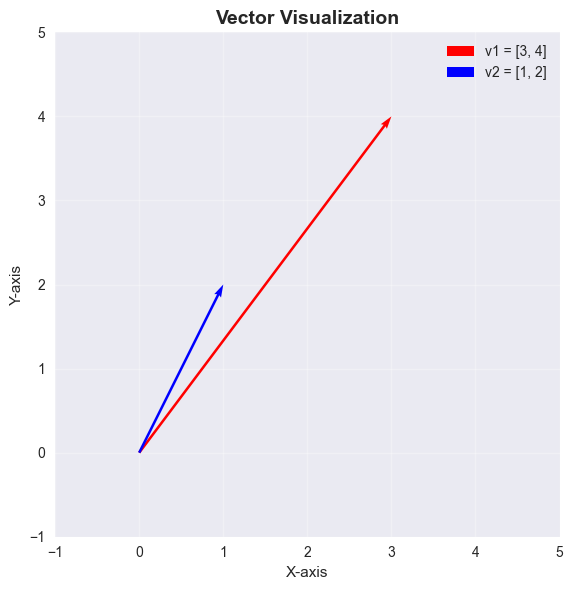

In [15]:
# Creating vectors in NumPy
# Column vector (most common in ML)
v1 = np.array([[3], [4]])  # 2D vector
v2 = np.array([[1], [2]]) 

# Row vector
v1_row = np.array([3, 4])
v2_row = np.array([1, 2])

print("Column vectors:")
print(f"v1 = \n{v1}")
print(f"v2 = \n{v2}")

print("\nRow vectors:")
print(f"v1 = {v1_row}")
print(f"v2 = {v2_row}")

# Visualizing vectors
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vectors from origin
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='v2 = [1, 2]')

# Add grid and formatting
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.tight_layout()
plt.show()

## Vector Operations

### 1. Vector Addition
$$\vec{u} + \vec{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$

**Geometric Interpretation**: Placing vectors head-to-tail

v1 + v2 = [3 4] + [1 2] = [4 6]


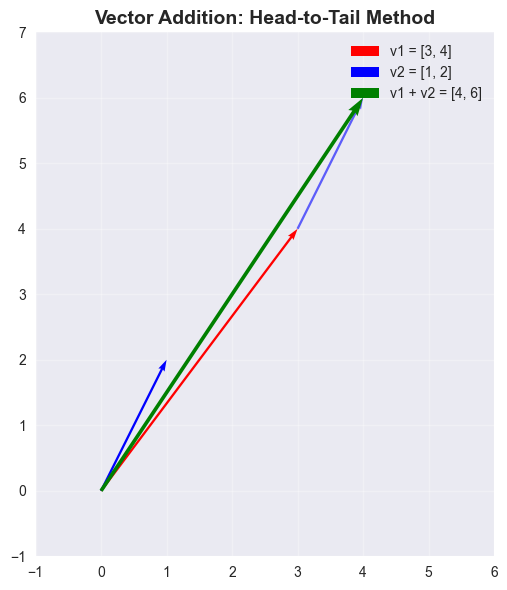

In [16]:
# Vector addition
v_sum = v1_row + v2_row
print(f"v1 + v2 = {v1_row} + {v2_row} = {v_sum}")

# Visualize vector addition
fig, ax = plt.subplots(figsize=(10, 6))

# Original vectors
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, label='v2 = [1, 2]')

# Vector addition (head-to-tail)
ax.quiver(v1_row[0], v1_row[1], v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, alpha=0.6, linestyle='--')

# Resultant vector
ax.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, 
          color='green', width=0.008, label=f'v1 + v2 = [{v_sum[0]}, {v_sum[1]}]')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Addition: Head-to-Tail Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Scalar Multiplication
$$c \cdot \vec{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \\ \vdots \\ c \cdot v_n \end{bmatrix}$$

**Geometric Interpretation**: Scaling the vector (magnitude) without changing direction

2.5 * v1 = 2.5 * [3 4] = [ 7.5 10. ]


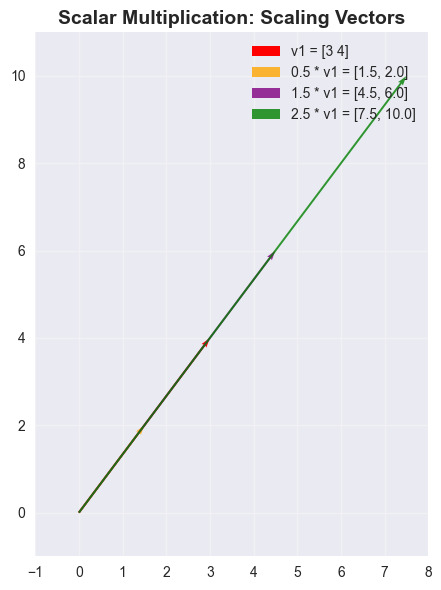

In [17]:
# Scalar multiplication
scalar = 2.5
v_scaled = scalar * v1_row
print(f"{scalar} * v1 = {scalar} * {v1_row} = {v_scaled}")

# Visualize scalar multiplication
fig, ax = plt.subplots(figsize=(10, 6))

# Original vector
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label=f'v1 = {v1_row}')

# Scaled vectors
for s, color in [(0.5, 'orange'), (1.5, 'purple'), (2.5, 'green')]:
    v_s = s * v1_row
    ax.quiver(0, 0, v_s[0], v_s[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.005, alpha=0.8, label=f'{s} * v1 = [{v_s[0]:.1f}, {v_s[1]:.1f}]')

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Scalar Multiplication: Scaling Vectors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Dot Product (Inner Product)
$$\vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n = |\vec{u}||\vec{v}|\cos(\theta)$$

**Key Properties**:
- Returns a **scalar** (not a vector)
- Measures **similarity** between vectors
- Related to the **angle** between vectors
- **Zero** when vectors are perpendicular

v1 · v2 = [3 4] · [1 2] = 3*1 + 4*2 = 11

Magnitudes:
|v1| = 5.000
|v2| = 2.236

Angle between vectors: 10.30°


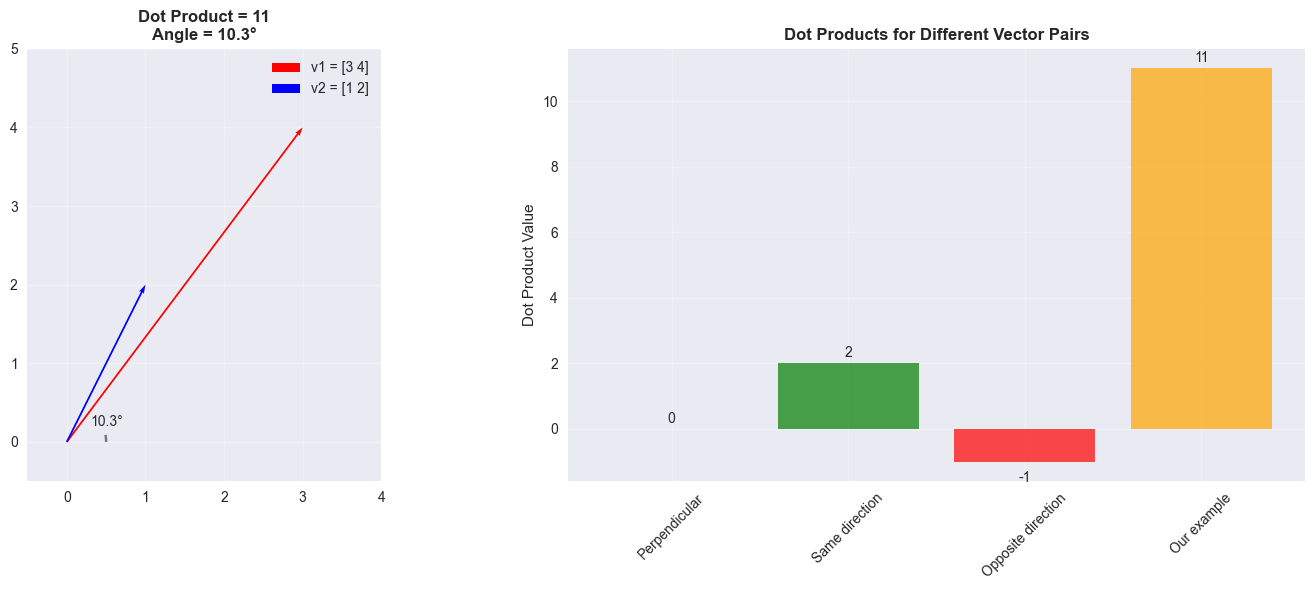

In [18]:
# Dot product calculation
dot_product = np.dot(v1_row, v2_row)
print(f"v1 · v2 = {v1_row} · {v2_row} = {v1_row[0]}*{v2_row[0]} + {v1_row[1]}*{v2_row[1]} = {dot_product}")

# Calculate angle between vectors
magnitude_v1 = np.linalg.norm(v1_row)
magnitude_v2 = np.linalg.norm(v2_row)
cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
angle_radians = np.arccos(cos_theta)
angle_degrees = np.degrees(angle_radians)

print(f"\nMagnitudes:")
print(f"|v1| = {magnitude_v1:.3f}")
print(f"|v2| = {magnitude_v2:.3f}")
print(f"\nAngle between vectors: {angle_degrees:.2f}°")

# Visualize dot product interpretation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Vectors and angle
ax1.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label=f'v1 = {v1_row}')
ax1.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.005, label=f'v2 = {v2_row}')

# Draw angle arc
theta_range = np.linspace(0, angle_radians, 50)
arc_x = 0.5 * np.cos(theta_range)
arc_y = 0.5 * np.sin(theta_range)
ax1.plot(arc_x, arc_y, 'k--', alpha=0.5)
ax1.text(0.3, 0.2, f'{angle_degrees:.1f}°', fontsize=10)

ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 5)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title(f'Dot Product = {dot_product}\nAngle = {angle_degrees:.1f}°', fontweight='bold')

# Right plot: Different vector pairs and their dot products
test_vectors = [
    ([1, 0], [0, 1], 'Perpendicular'),
    ([1, 1], [1, 1], 'Same direction'),
    ([1, 0], [-1, 0], 'Opposite direction'),
    ([3, 4], [1, 2], 'Our example')
]

colors = ['purple', 'green', 'red', 'orange']
dot_products = []
labels = []

for i, (u, v, desc) in enumerate(test_vectors):
    dot = np.dot(u, v)
    dot_products.append(dot)
    labels.append(f'{desc}\n{u}·{v}={dot}')

bars = ax2.bar(range(len(dot_products)), dot_products, color=colors, alpha=0.7)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels([label.split('\n')[0] for label in labels], rotation=45)
ax2.set_ylabel('Dot Product Value')
ax2.set_title('Dot Products for Different Vector Pairs', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, dp in zip(bars, dot_products):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height >= 0 else height - 0.3,
             f'{dp}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

### 4. Cross Product (3D Only)
$$\vec{u} \times \vec{v} = \begin{bmatrix} u_2v_3 - u_3v_2 \\ u_3v_1 - u_1v_3 \\ u_1v_2 - u_2v_1 \end{bmatrix}$$

**Key Properties**:
- Returns a **vector** perpendicular to both input vectors
- Magnitude = area of parallelogram formed by the vectors
- Direction follows **right-hand rule**

u = [1 2 3]
v = [4 5 6]
u × v = [-3  6 -3]

Verifying perpendicularity:
u · (u × v) = 0 (should be 0)
v · (u × v) = 0 (should be 0)


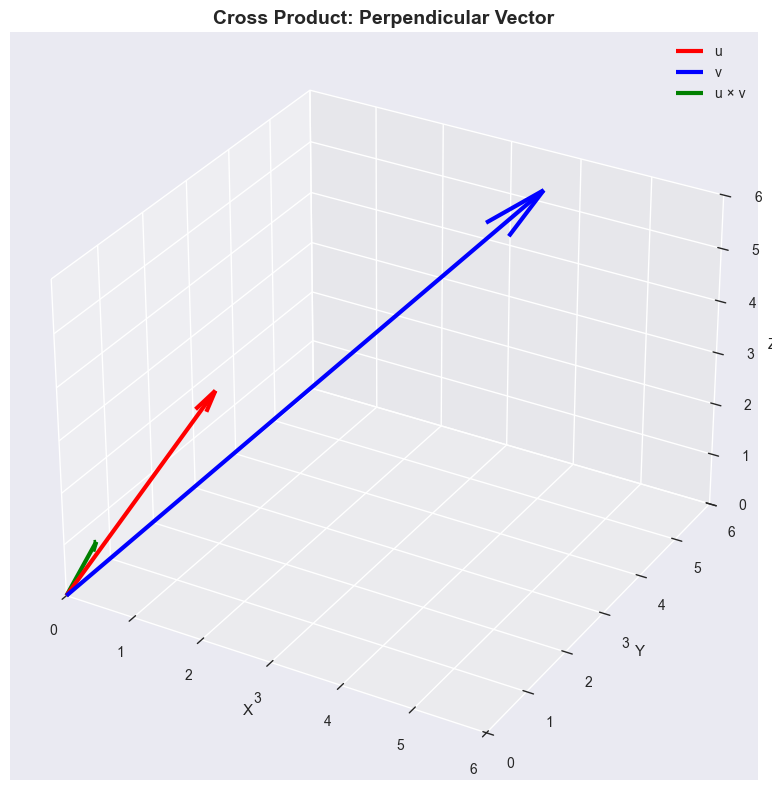

In [19]:
# Cross product in 3D
u_3d = np.array([1, 2, 3])
v_3d = np.array([4, 5, 6])

cross_product = np.cross(u_3d, v_3d)
print(f"u = {u_3d}")
print(f"v = {v_3d}")
print(f"u × v = {cross_product}")

# Verify perpendicularity
dot_u_cross = np.dot(u_3d, cross_product)
dot_v_cross = np.dot(v_3d, cross_product)
print(f"\nVerifying perpendicularity:")
print(f"u · (u × v) = {dot_u_cross} (should be 0)")
print(f"v · (u × v) = {dot_v_cross} (should be 0)")

# 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original vectors
ax.quiver(0, 0, 0, u_3d[0], u_3d[1], u_3d[2], color='red', arrow_length_ratio=0.1, label='u', linewidth=3)
ax.quiver(0, 0, 0, v_3d[0], v_3d[1], v_3d[2], color='blue', arrow_length_ratio=0.1, label='v', linewidth=3)

# Plot cross product (scaled for visibility)
cross_scaled = cross_product / np.linalg.norm(cross_product) * 3
ax.quiver(0, 0, 0, cross_scaled[0], cross_scaled[1], cross_scaled[2], 
          color='green', arrow_length_ratio=0.1, label='u × v', linewidth=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Cross Product: Perpendicular Vector', fontsize=14, fontweight='bold')

# Set equal aspect ratio
max_range = 6
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])

plt.tight_layout()
plt.show()

### 5. Vector Norms (Magnitude)

#### L2 Norm (Euclidean Norm)
$$||\vec{v}||_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$$

#### L1 Norm (Manhattan Norm)
$$||\vec{v}||_1 = |v_1| + |v_2| + \cdots + |v_n|$$

#### L∞ Norm (Maximum Norm)
$$||\vec{v}||_\infty = \max(|v_1|, |v_2|, \ldots, |v_n|)$$

Vector v = [3 4]
L2 norm (Euclidean): ||v||₂ = 5.000
L1 norm (Manhattan):  ||v||₁ = 7.000
L∞ norm (Maximum):   ||v||∞ = 4.000


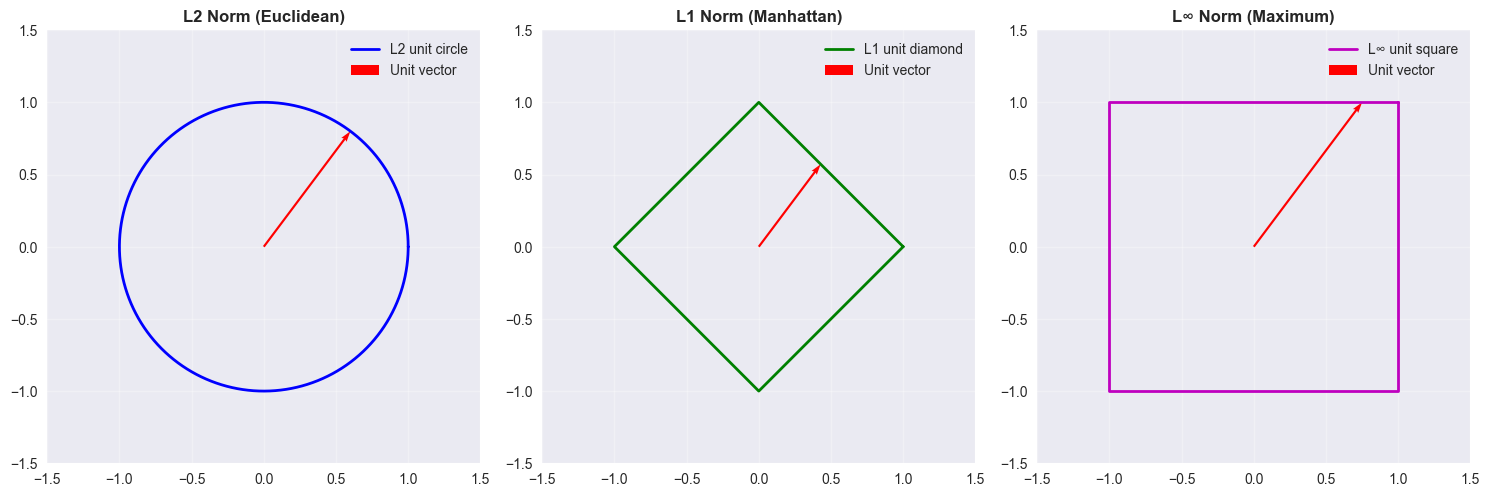

In [20]:
# Vector norms
v = np.array([3, 4])

# Different norms
l2_norm = np.linalg.norm(v, 2)  # or just np.linalg.norm(v)
l1_norm = np.linalg.norm(v, 1)
linf_norm = np.linalg.norm(v, np.inf)

print(f"Vector v = {v}")
print(f"L2 norm (Euclidean): ||v||₂ = {l2_norm:.3f}")
print(f"L1 norm (Manhattan):  ||v||₁ = {l1_norm:.3f}")
print(f"L∞ norm (Maximum):   ||v||∞ = {linf_norm:.3f}")

# Visualize different norms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create unit circles for different norms
theta = np.linspace(0, 2*np.pi, 1000)

# L2 norm (circle)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)
axes[0].plot(x_l2, y_l2, 'b-', linewidth=2, label='L2 unit circle')
axes[0].quiver(0, 0, v[0]/l2_norm, v[1]/l2_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[0].set_title('L2 Norm (Euclidean)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].legend()

# L1 norm (diamond)
x_l1 = np.array([1, 0, -1, 0, 1])
y_l1 = np.array([0, 1, 0, -1, 0])
axes[1].plot(x_l1, y_l1, 'g-', linewidth=2, label='L1 unit diamond')
axes[1].quiver(0, 0, v[0]/l1_norm, v[1]/l1_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[1].set_title('L1 Norm (Manhattan)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].legend()

# L∞ norm (square)
x_linf = np.array([1, 1, -1, -1, 1])
y_linf = np.array([1, -1, -1, 1, 1])
axes[2].plot(x_linf, y_linf, 'm-', linewidth=2, label='L∞ unit square')
axes[2].quiver(0, 0, v[0]/linf_norm, v[1]/linf_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[2].set_title('L∞ Norm (Maximum)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].legend()

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# 2. Matrices: The Powerhouse of ML

## What is a Matrix?
A matrix is a rectangular array of numbers arranged in rows and columns:
$$A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix}$$

**ML Context**: 
- **Data matrix**: Each row = sample, each column = feature
- **Weight matrix**: Neural network parameters
- **Transformation matrix**: Rotations, scaling, projections

In [21]:
# Creating matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print("Matrix A (2×3):")
print(A)
print(f"Shape: {A.shape}")

print("\nMatrix B (3×2):")
print(B)
print(f"Shape: {B.shape}")

# Special matrices
I = np.eye(3)  # Identity matrix
Z = np.zeros((2, 3))  # Zero matrix
O = np.ones((3, 2))  # Ones matrix

print("\nSpecial Matrices:")
print(f"Identity (3×3):\n{I}")
print(f"\nZeros (2×3):\n{Z}")
print(f"\nOnes (3×2):\n{O}")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]
Shape: (3, 2)

Special Matrices:
Identity (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zeros (2×3):
[[0. 0. 0.]
 [0. 0. 0.]]

Ones (3×2):
[[1. 1.]
 [1. 1.]
 [1. 1.]]


## Matrix Operations

### 1. Matrix Addition and Subtraction
Only possible when matrices have the same dimensions:
$$C = A + B \quad \text{where} \quad c_{ij} = a_{ij} + b_{ij}$$

In [22]:
# Matrix addition/subtraction (same dimensions)
M1 = np.array([[1, 2], [3, 4]])
M2 = np.array([[5, 6], [7, 8]])

M_sum = M1 + M2
M_diff = M1 - M2

print("Matrix Addition:")
print(f"M1 =\n{M1}")
print(f"\nM2 =\n{M2}")
print(f"\nM1 + M2 =\n{M_sum}")
print(f"\nM1 - M2 =\n{M_diff}")

Matrix Addition:
M1 =
[[1 2]
 [3 4]]

M2 =
[[5 6]
 [7 8]]

M1 + M2 =
[[ 6  8]
 [10 12]]

M1 - M2 =
[[-4 -4]
 [-4 -4]]


### 2. Matrix Multiplication
**Rule**: (m×n) × (n×p) = (m×p)

$$C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}$$

**Key Points**:
- Inner dimensions must match
- **Not commutative**: AB ≠ BA (usually)
- **Associative**: (AB)C = A(BC)

In [23]:
# Matrix multiplication
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2×3

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])   # 3×2

# A × B is valid (2×3) × (3×2) = (2×2)
AB = np.dot(A, B)  # or A @ B

print("Matrix Multiplication:")
print(f"A (2×3) =\n{A}")
print(f"\nB (3×2) =\n{B}")
print(f"\nA × B (2×2) =\n{AB}")

# Verify manual calculation for first element
manual_calc = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]
print(f"\nManual calculation of AB[0,0]: {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} + {A[0,2]}×{B[2,0]} = {manual_calc}")

# Demonstrate non-commutativity
print("\n" + "="*50)
print("DEMONSTRATING NON-COMMUTATIVITY")
print("="*50)

# Create square matrices for comparison
X = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])

XY = X @ Y
YX = Y @ X

print(f"X =\n{X}")
print(f"\nY =\n{Y}")
print(f"\nX × Y =\n{XY}")
print(f"\nY × X =\n{YX}")
print(f"\nAre they equal? {np.array_equal(XY, YX)}")

Matrix Multiplication:
A (2×3) =
[[1 2 3]
 [4 5 6]]

B (3×2) =
[[ 7  8]
 [ 9 10]
 [11 12]]

A × B (2×2) =
[[ 58  64]
 [139 154]]

Manual calculation of AB[0,0]: 1×7 + 2×9 + 3×11 = 58

DEMONSTRATING NON-COMMUTATIVITY
X =
[[1 2]
 [3 4]]

Y =
[[5 6]
 [7 8]]

X × Y =
[[19 22]
 [43 50]]

Y × X =
[[23 34]
 [31 46]]

Are they equal? False


### 3. Matrix Transpose
**Definition**: Flip matrix over its diagonal
$$A^T_{ij} = A_{ji}$$

**Properties**:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$
- $(AB)^T = B^T A^T$

Matrix Transpose:
A (2×3) =
[[1 2 3]
 [4 5 6]]

A^T (3×2) =
[[1 4]
 [2 5]
 [3 6]]

Verifying Properties:
(A^T)^T = A? True
(BC)^T = C^T B^T? True


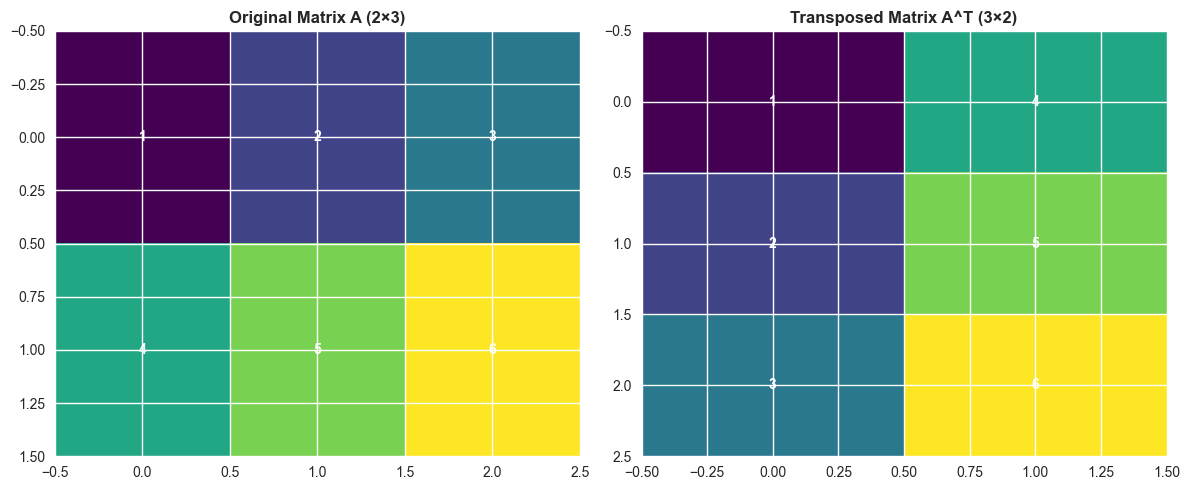

In [24]:
# Matrix transpose
A = np.array([[1, 2, 3],
              [4, 5, 6]])

A_T = A.T  # or np.transpose(A)

print("Matrix Transpose:")
print(f"A (2×3) =\n{A}")
print(f"\nA^T (3×2) =\n{A_T}")

# Verify properties
print("\nVerifying Properties:")
print(f"(A^T)^T = A? {np.array_equal((A.T).T, A)}")

# For square matrices
B = np.array([[1, 2], [3, 4]])
C = np.array([[5, 6], [7, 8]])

BC = B @ C
BC_T = BC.T
CT_BT = C.T @ B.T

print(f"(BC)^T = C^T B^T? {np.array_equal(BC_T, CT_BT)}")

# Visualize transpose operation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original matrix
im1 = ax1.imshow(A, cmap='viridis', aspect='auto')
ax1.set_title('Original Matrix A (2×3)', fontweight='bold')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax1.text(j, i, str(A[i, j]), ha='center', va='center', color='white', fontweight='bold')

# Transposed matrix
im2 = ax2.imshow(A_T, cmap='viridis', aspect='auto')
ax2.set_title('Transposed Matrix A^T (3×2)', fontweight='bold')
for i in range(A_T.shape[0]):
    for j in range(A_T.shape[1]):
        ax2.text(j, i, str(A_T[i, j]), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Matrix Inverse
**Definition**: For square matrix A, if A⁻¹ exists:
$$A \cdot A^{-1} = A^{-1} \cdot A = I$$

**Conditions for Existence**:
- Matrix must be **square**
- Matrix must be **non-singular** (det(A) ≠ 0)

**ML Applications**: Solving linear equations, pseudo-inverse for regression

In [25]:
# Matrix inverse
A = np.array([[2, 1],
              [1, 1]], dtype=float)

# Check if matrix is invertible (determinant ≠ 0)
det_A = np.linalg.det(A)
print(f"Matrix A =\n{A}")
print(f"\nDeterminant of A: {det_A:.3f}")

if abs(det_A) > 1e-10:  # Check for numerical stability
    A_inv = np.linalg.inv(A)
    print(f"\nA^(-1) =\n{A_inv}")
    
    # Verify A * A^(-1) = I
    identity_check = A @ A_inv
    print(f"\nA × A^(-1) =\n{identity_check}")
    print(f"\nIs it identity? {np.allclose(identity_check, np.eye(2))}")
    
    # Solve linear system Ax = b using inverse
    b = np.array([5, 3])
    x_inv = A_inv @ b
    x_solve = np.linalg.solve(A, b)  # More numerically stable
    
    print(f"\nSolving Ax = b where b = {b}:")
    print(f"Using inverse: x = {x_inv}")
    print(f"Using solve:   x = {x_solve}")
    print(f"Verification Ax = {A @ x_solve}")
else:
    print("\nMatrix is singular (not invertible)!")

# Example of singular matrix
print("\n" + "="*40)
print("EXAMPLE OF SINGULAR MATRIX")
print("="*40)

singular_matrix = np.array([[1, 2],
                           [2, 4]])
det_singular = np.linalg.det(singular_matrix)
print(f"Singular matrix =\n{singular_matrix}")
print(f"Determinant: {det_singular:.3f}")
print("This matrix is not invertible because its rows are linearly dependent.")

Matrix A =
[[2. 1.]
 [1. 1.]]

Determinant of A: 1.000

A^(-1) =
[[ 1. -1.]
 [-1.  2.]]

A × A^(-1) =
[[1. 0.]
 [0. 1.]]

Is it identity? True

Solving Ax = b where b = [5 3]:
Using inverse: x = [2. 1.]
Using solve:   x = [2. 1.]
Verification Ax = [5. 3.]

EXAMPLE OF SINGULAR MATRIX
Singular matrix =
[[1 2]
 [2 4]]
Determinant: 0.000
This matrix is not invertible because its rows are linearly dependent.


### 5. Determinant
**Definition**: A scalar value that characterizes the matrix

**2×2 Matrix**:
$$\det(A) = \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc$$

**Geometric Interpretation**:
- **Area scaling factor** for 2D transformations
- **Volume scaling factor** for 3D transformations
- **Zero determinant** = matrix collapses space to lower dimension

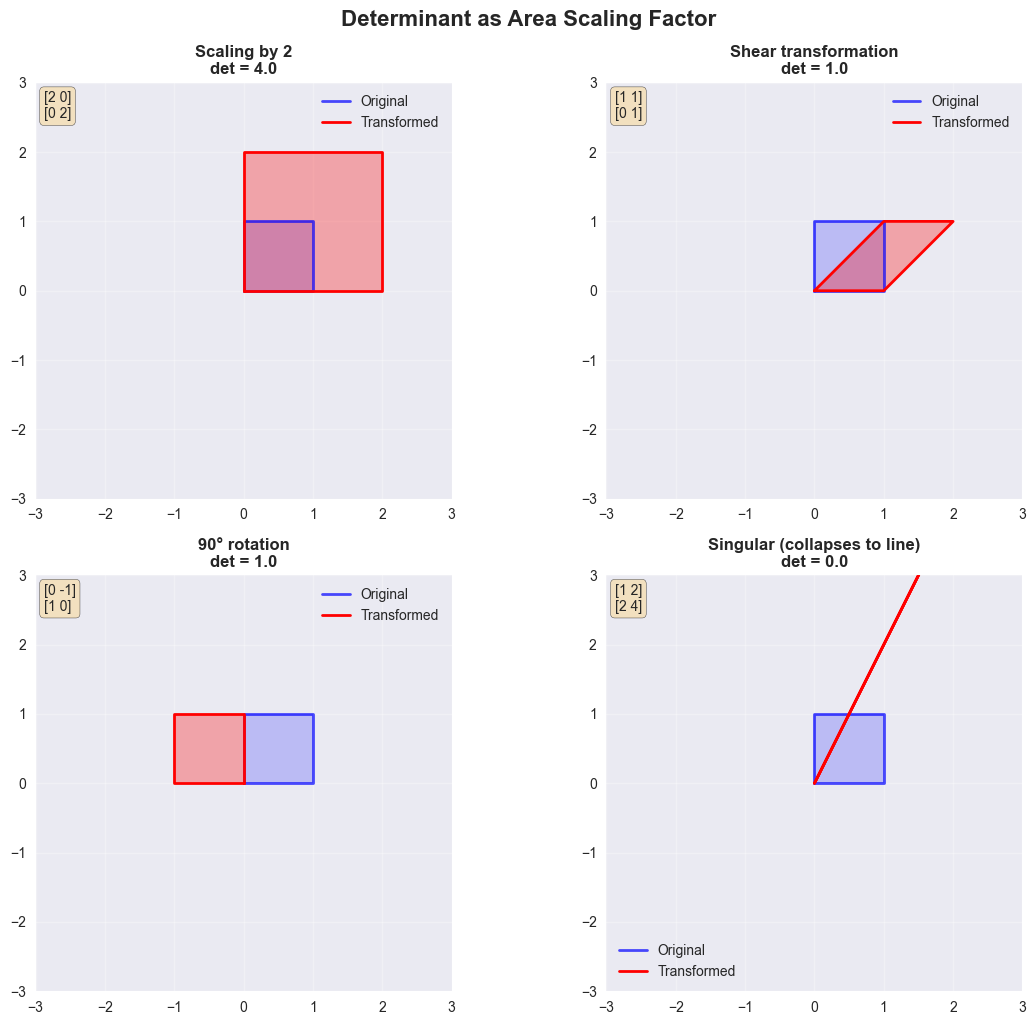

Determinant Properties:
det(A) = 5.000
det(B) = -5.000
det(AB) = -25.000
det(A) × det(B) = -25.000
det(A^T) = 5.000

Property checks:
det(AB) = det(A) × det(B)? True
det(A^T) = det(A)? True


In [26]:
# Determinant and its geometric interpretation
matrices = [
    (np.array([[2, 0], [0, 2]]), "Scaling by 2"),
    (np.array([[1, 1], [0, 1]]), "Shear transformation"),
    (np.array([[0, -1], [1, 0]]), "90° rotation"),
    (np.array([[1, 2], [2, 4]]), "Singular (collapses to line)")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Unit square vertices
unit_square = np.array([[0, 1, 1, 0, 0],
                       [0, 0, 1, 1, 0]])

for i, (matrix, title) in enumerate(matrices):
    # Transform unit square
    transformed = matrix @ unit_square
    
    # Calculate determinant
    det = np.linalg.det(matrix)
    
    # Plot
    axes[i].plot(unit_square[0], unit_square[1], 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[i].fill(unit_square[0], unit_square[1], 'blue', alpha=0.2)
    
    axes[i].plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')
    axes[i].fill(transformed[0], transformed[1], 'red', alpha=0.3)
    
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_aspect('equal')
    axes[i].legend()
    axes[i].set_title(f'{title}\ndet = {det:.1f}', fontweight='bold')
    
    # Add matrix text
    matrix_str = f'[{matrix[0,0]:.0f} {matrix[0,1]:.0f}]\n[{matrix[1,0]:.0f} {matrix[1,1]:.0f}]'
    axes[i].text(0.02, 0.98, matrix_str, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.suptitle('Determinant as Area Scaling Factor', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Properties of determinant
print("Determinant Properties:")
A = np.array([[2, 3], [1, 4]])
B = np.array([[1, 2], [3, 1]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_AB = np.linalg.det(A @ B)
det_AT = np.linalg.det(A.T)

print(f"det(A) = {det_A:.3f}")
print(f"det(B) = {det_B:.3f}")
print(f"det(AB) = {det_AB:.3f}")
print(f"det(A) × det(B) = {det_A * det_B:.3f}")
print(f"det(A^T) = {det_AT:.3f}")
print(f"\nProperty checks:")
print(f"det(AB) = det(A) × det(B)? {np.isclose(det_AB, det_A * det_B)}")
print(f"det(A^T) = det(A)? {np.isclose(det_AT, det_A)}")

# Linear Algebra Fundamentals for Machine Learning

This notebook covers the essential linear algebra concepts needed for ML/AI:
1. **Vectors**: Operations, dot product, cross product, norms
2. **Matrices**: Multiplication, transpose, inverse, determinant
3. **Eigenvalues/Eigenvectors**: Principal components, dimensionality reduction
4. **Vector Spaces**: Basis, linear independence, span

## Why Linear Algebra Matters in ML
- **90% of ML algorithms** rely on matrix operations
- **Data representation**: Images, text, features are all vectors/matrices
- **Transformations**: Rotations, scaling, projections
- **Dimensionality reduction**: PCA, SVD
- **Neural networks**: Weight matrices, forward/backward propagation

In [27]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

📚 Libraries imported successfully!
NumPy version: 2.1.3


# 1. Vectors: The Building Blocks

## What is a Vector?
A vector is an ordered list of numbers that represents:
- **Geometric**: Direction and magnitude in space
- **Algebraic**: A point in n-dimensional space
- **ML Context**: Features of a data point

### Vector Representation
$$\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Column vectors:
v1 = 
[[3]
 [4]]
v2 = 
[[1]
 [2]]

Row vectors:
v1 = [3 4]
v2 = [1 2]


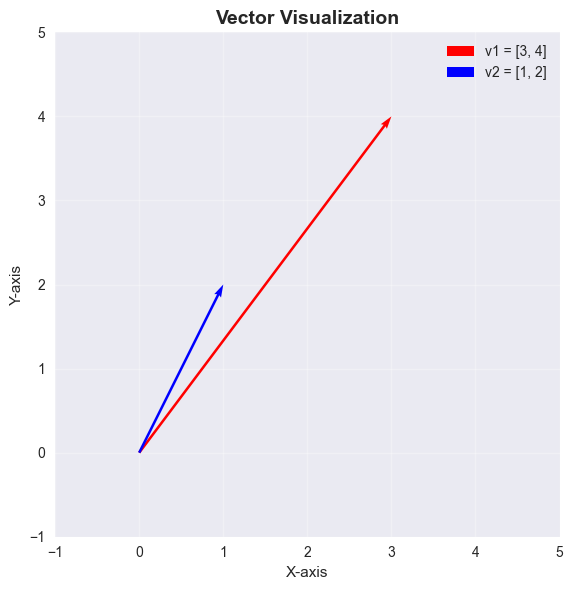

In [28]:
# Creating vectors in NumPy
# Column vector (most common in ML)
v1 = np.array([[3], [4]])  # 2D vector
v2 = np.array([[1], [2]]) 

# Row vector
v1_row = np.array([3, 4])
v2_row = np.array([1, 2])

print("Column vectors:")
print(f"v1 = \n{v1}")
print(f"v2 = \n{v2}")

print("\nRow vectors:")
print(f"v1 = {v1_row}")
print(f"v2 = {v2_row}")

# Visualizing vectors
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vectors from origin
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='v2 = [1, 2]')

# Add grid and formatting
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.tight_layout()
plt.show()

## Vector Operations

### 1. Vector Addition
$$\vec{u} + \vec{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$

**Geometric Interpretation**: Placing vectors head-to-tail

v1 + v2 = [3 4] + [1 2] = [4 6]


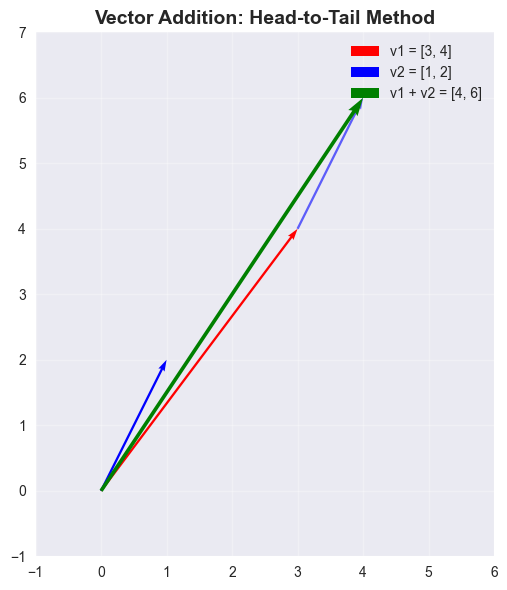

In [29]:
# Vector addition
v_sum = v1_row + v2_row
print(f"v1 + v2 = {v1_row} + {v2_row} = {v_sum}")

# Visualize vector addition
fig, ax = plt.subplots(figsize=(10, 6))

# Original vectors
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, label='v2 = [1, 2]')

# Vector addition (head-to-tail)
ax.quiver(v1_row[0], v1_row[1], v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, alpha=0.6, linestyle='--')

# Resultant vector
ax.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, 
          color='green', width=0.008, label=f'v1 + v2 = [{v_sum[0]}, {v_sum[1]}]')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Addition: Head-to-Tail Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Scalar Multiplication
$$c \cdot \vec{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \\ \vdots \\ c \cdot v_n \end{bmatrix}$$

**Geometric Interpretation**: Scaling the vector (magnitude) without changing direction

2.5 * v1 = 2.5 * [3 4] = [ 7.5 10. ]


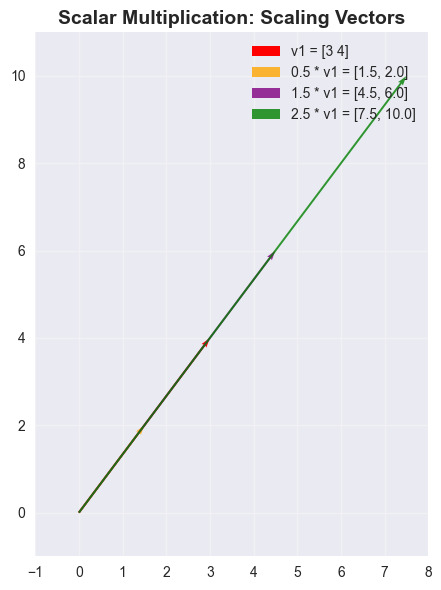

In [30]:
# Scalar multiplication
scalar = 2.5
v_scaled = scalar * v1_row
print(f"{scalar} * v1 = {scalar} * {v1_row} = {v_scaled}")

# Visualize scalar multiplication
fig, ax = plt.subplots(figsize=(10, 6))

# Original vector
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label=f'v1 = {v1_row}')

# Scaled vectors
for s, color in [(0.5, 'orange'), (1.5, 'purple'), (2.5, 'green')]:
    v_s = s * v1_row
    ax.quiver(0, 0, v_s[0], v_s[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.005, alpha=0.8, label=f'{s} * v1 = [{v_s[0]:.1f}, {v_s[1]:.1f}]')

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Scalar Multiplication: Scaling Vectors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Dot Product (Inner Product)
$$\vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n = |\vec{u}||\vec{v}|\cos(\theta)$$

**Key Properties**:
- Returns a **scalar** (not a vector)
- Measures **similarity** between vectors
- Related to the **angle** between vectors
- **Zero** when vectors are perpendicular

v1 · v2 = [3 4] · [1 2] = 3*1 + 4*2 = 11

Magnitudes:
|v1| = 5.000
|v2| = 2.236

Angle between vectors: 10.30°


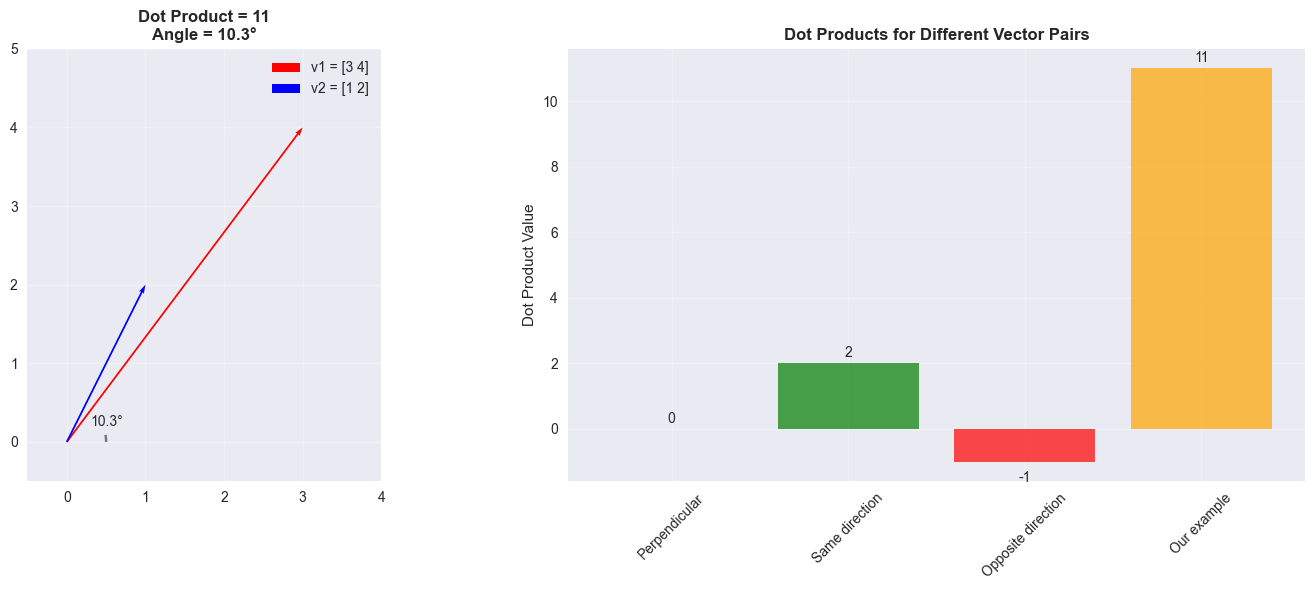

In [31]:
# Dot product calculation
dot_product = np.dot(v1_row, v2_row)
print(f"v1 · v2 = {v1_row} · {v2_row} = {v1_row[0]}*{v2_row[0]} + {v1_row[1]}*{v2_row[1]} = {dot_product}")

# Calculate angle between vectors
magnitude_v1 = np.linalg.norm(v1_row)
magnitude_v2 = np.linalg.norm(v2_row)
cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
angle_radians = np.arccos(cos_theta)
angle_degrees = np.degrees(angle_radians)

print(f"\nMagnitudes:")
print(f"|v1| = {magnitude_v1:.3f}")
print(f"|v2| = {magnitude_v2:.3f}")
print(f"\nAngle between vectors: {angle_degrees:.2f}°")

# Visualize dot product interpretation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Vectors and angle
ax1.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label=f'v1 = {v1_row}')
ax1.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.005, label=f'v2 = {v2_row}')

# Draw angle arc
theta_range = np.linspace(0, angle_radians, 50)
arc_x = 0.5 * np.cos(theta_range)
arc_y = 0.5 * np.sin(theta_range)
ax1.plot(arc_x, arc_y, 'k--', alpha=0.5)
ax1.text(0.3, 0.2, f'{angle_degrees:.1f}°', fontsize=10)

ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 5)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title(f'Dot Product = {dot_product}\nAngle = {angle_degrees:.1f}°', fontweight='bold')

# Right plot: Different vector pairs and their dot products
test_vectors = [
    ([1, 0], [0, 1], 'Perpendicular'),
    ([1, 1], [1, 1], 'Same direction'),
    ([1, 0], [-1, 0], 'Opposite direction'),
    ([3, 4], [1, 2], 'Our example')
]

colors = ['purple', 'green', 'red', 'orange']
dot_products = []
labels = []

for i, (u, v, desc) in enumerate(test_vectors):
    dot = np.dot(u, v)
    dot_products.append(dot)
    labels.append(f'{desc}\n{u}·{v}={dot}')

bars = ax2.bar(range(len(dot_products)), dot_products, color=colors, alpha=0.7)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels([label.split('\n')[0] for label in labels], rotation=45)
ax2.set_ylabel('Dot Product Value')
ax2.set_title('Dot Products for Different Vector Pairs', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, dp in zip(bars, dot_products):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height >= 0 else height - 0.3,
             f'{dp}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

### 4. Cross Product (3D Only)
$$\vec{u} \times \vec{v} = \begin{bmatrix} u_2v_3 - u_3v_2 \\ u_3v_1 - u_1v_3 \\ u_1v_2 - u_2v_1 \end{bmatrix}$$

**Key Properties**:
- Returns a **vector** perpendicular to both input vectors
- Magnitude = area of parallelogram formed by the vectors
- Direction follows **right-hand rule**

u = [1 2 3]
v = [4 5 6]
u × v = [-3  6 -3]

Verifying perpendicularity:
u · (u × v) = 0 (should be 0)
v · (u × v) = 0 (should be 0)


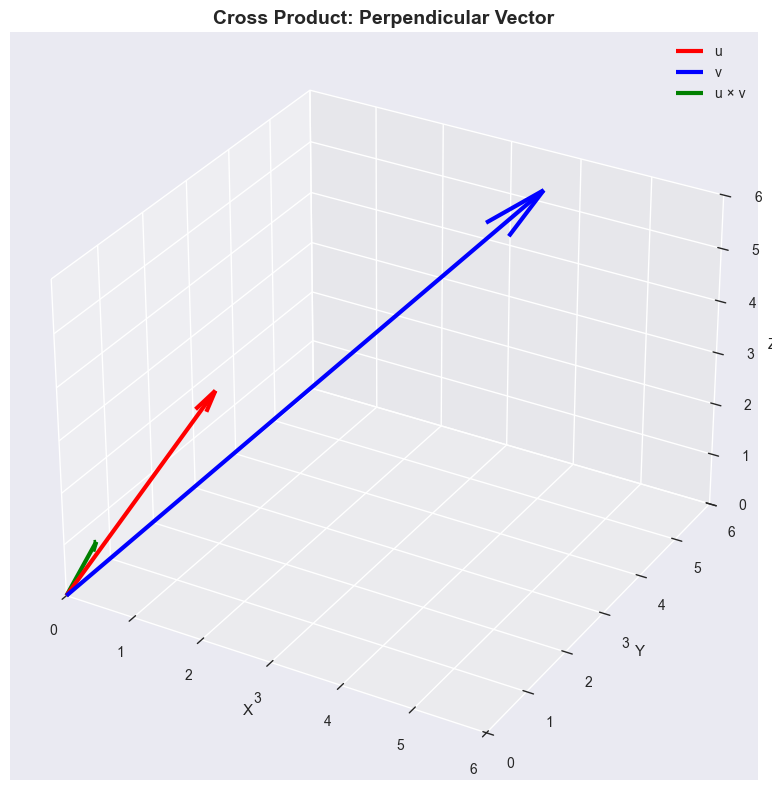

In [32]:
# Cross product in 3D
u_3d = np.array([1, 2, 3])
v_3d = np.array([4, 5, 6])

cross_product = np.cross(u_3d, v_3d)
print(f"u = {u_3d}")
print(f"v = {v_3d}")
print(f"u × v = {cross_product}")

# Verify perpendicularity
dot_u_cross = np.dot(u_3d, cross_product)
dot_v_cross = np.dot(v_3d, cross_product)
print(f"\nVerifying perpendicularity:")
print(f"u · (u × v) = {dot_u_cross} (should be 0)")
print(f"v · (u × v) = {dot_v_cross} (should be 0)")

# 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original vectors
ax.quiver(0, 0, 0, u_3d[0], u_3d[1], u_3d[2], color='red', arrow_length_ratio=0.1, label='u', linewidth=3)
ax.quiver(0, 0, 0, v_3d[0], v_3d[1], v_3d[2], color='blue', arrow_length_ratio=0.1, label='v', linewidth=3)

# Plot cross product (scaled for visibility)
cross_scaled = cross_product / np.linalg.norm(cross_product) * 3
ax.quiver(0, 0, 0, cross_scaled[0], cross_scaled[1], cross_scaled[2], 
          color='green', arrow_length_ratio=0.1, label='u × v', linewidth=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Cross Product: Perpendicular Vector', fontsize=14, fontweight='bold')

# Set equal aspect ratio
max_range = 6
ax.set_xlim([0, max_range])
ax.set_ylim([0, max_range])
ax.set_zlim([0, max_range])

plt.tight_layout()
plt.show()

### 5. Vector Norms (Magnitude)

#### L2 Norm (Euclidean Norm)
$$||\vec{v}||_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$$

#### L1 Norm (Manhattan Norm)
$$||\vec{v}||_1 = |v_1| + |v_2| + \cdots + |v_n|$$

#### L∞ Norm (Maximum Norm)
$$||\vec{v}||_\infty = \max(|v_1|, |v_2|, \ldots, |v_n|)$$

Vector v = [3 4]
L2 norm (Euclidean): ||v||₂ = 5.000
L1 norm (Manhattan):  ||v||₁ = 7.000
L∞ norm (Maximum):   ||v||∞ = 4.000


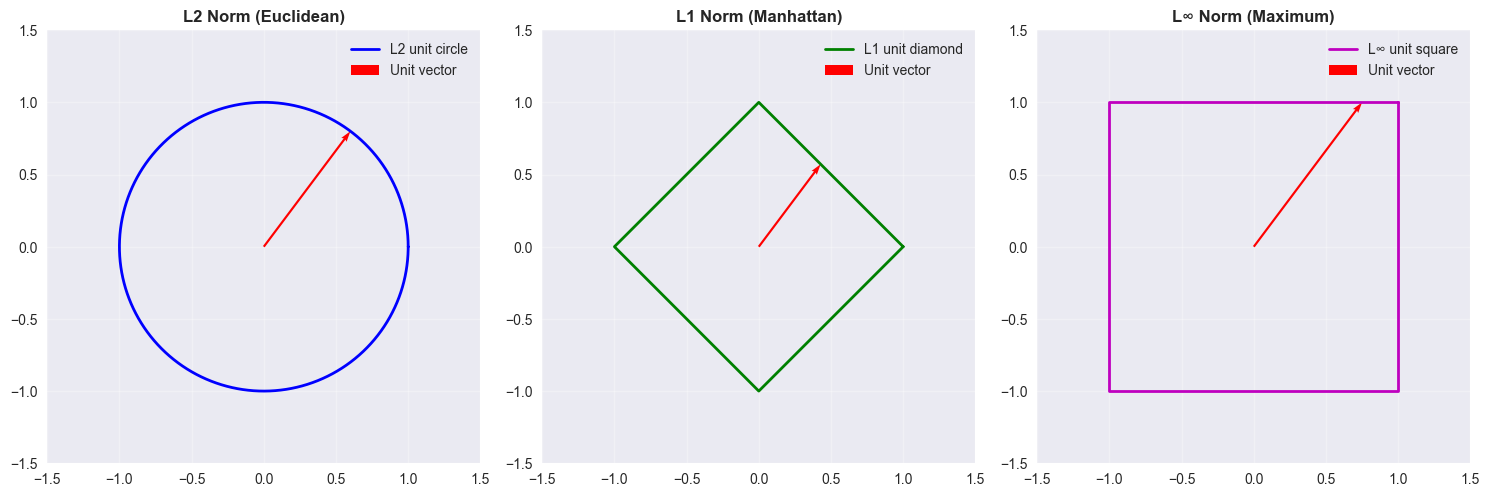

In [33]:
# Vector norms
v = np.array([3, 4])

# Different norms
l2_norm = np.linalg.norm(v, 2)  # or just np.linalg.norm(v)
l1_norm = np.linalg.norm(v, 1)
linf_norm = np.linalg.norm(v, np.inf)

print(f"Vector v = {v}")
print(f"L2 norm (Euclidean): ||v||₂ = {l2_norm:.3f}")
print(f"L1 norm (Manhattan):  ||v||₁ = {l1_norm:.3f}")
print(f"L∞ norm (Maximum):   ||v||∞ = {linf_norm:.3f}")

# Visualize different norms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create unit circles for different norms
theta = np.linspace(0, 2*np.pi, 1000)

# L2 norm (circle)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)
axes[0].plot(x_l2, y_l2, 'b-', linewidth=2, label='L2 unit circle')
axes[0].quiver(0, 0, v[0]/l2_norm, v[1]/l2_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[0].set_title('L2 Norm (Euclidean)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].legend()

# L1 norm (diamond)
x_l1 = np.array([1, 0, -1, 0, 1])
y_l1 = np.array([0, 1, 0, -1, 0])
axes[1].plot(x_l1, y_l1, 'g-', linewidth=2, label='L1 unit diamond')
axes[1].quiver(0, 0, v[0]/l1_norm, v[1]/l1_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[1].set_title('L1 Norm (Manhattan)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].legend()

# L∞ norm (square)
x_linf = np.array([1, 1, -1, -1, 1])
y_linf = np.array([1, -1, -1, 1, 1])
axes[2].plot(x_linf, y_linf, 'm-', linewidth=2, label='L∞ unit square')
axes[2].quiver(0, 0, v[0]/linf_norm, v[1]/linf_norm, angles='xy', scale_units='xy', scale=1, 
               color='red', width=0.005, label='Unit vector')
axes[2].set_title('L∞ Norm (Maximum)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].legend()

for ax in axes:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# 2. Matrices: The Powerhouse of ML

## What is a Matrix?
A matrix is a rectangular array of numbers arranged in rows and columns:
$$A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix}$$

**ML Context**: 
- **Data matrix**: Each row = sample, each column = feature
- **Weight matrix**: Neural network parameters
- **Transformation matrix**: Rotations, scaling, projections

In [34]:
# Creating matrices
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print("Matrix A (2×3):")
print(A)
print(f"Shape: {A.shape}")

print("\nMatrix B (3×2):")
print(B)
print(f"Shape: {B.shape}")

# Special matrices
I = np.eye(3)  # Identity matrix
Z = np.zeros((2, 3))  # Zero matrix
O = np.ones((3, 2))  # Ones matrix

print("\nSpecial Matrices:")
print(f"Identity (3×3):\n{I}")
print(f"\nZeros (2×3):\n{Z}")
print(f"\nOnes (3×2):\n{O}")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Matrix B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]
Shape: (3, 2)

Special Matrices:
Identity (3×3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Zeros (2×3):
[[0. 0. 0.]
 [0. 0. 0.]]

Ones (3×2):
[[1. 1.]
 [1. 1.]
 [1. 1.]]


## Matrix Operations

### 1. Matrix Addition and Subtraction
Only possible when matrices have the same dimensions:
$$C = A + B \quad \text{where} \quad c_{ij} = a_{ij} + b_{ij}$$

In [35]:
# Matrix addition/subtraction (same dimensions)
M1 = np.array([[1, 2], [3, 4]])
M2 = np.array([[5, 6], [7, 8]])

M_sum = M1 + M2
M_diff = M1 - M2

print("Matrix Addition:")
print(f"M1 =\n{M1}")
print(f"\nM2 =\n{M2}")
print(f"\nM1 + M2 =\n{M_sum}")
print(f"\nM1 - M2 =\n{M_diff}")

Matrix Addition:
M1 =
[[1 2]
 [3 4]]

M2 =
[[5 6]
 [7 8]]

M1 + M2 =
[[ 6  8]
 [10 12]]

M1 - M2 =
[[-4 -4]
 [-4 -4]]


### 2. Matrix Multiplication
**Rule**: (m×n) × (n×p) = (m×p)

$$C_{ij} = \sum_{k=1}^{n} A_{ik} \cdot B_{kj}$$

**Key Points**:
- Inner dimensions must match
- **Not commutative**: AB ≠ BA (usually)
- **Associative**: (AB)C = A(BC)

In [36]:
# Matrix multiplication
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2×3

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])   # 3×2

# A × B is valid (2×3) × (3×2) = (2×2)
AB = np.dot(A, B)  # or A @ B

print("Matrix Multiplication:")
print(f"A (2×3) =\n{A}")
print(f"\nB (3×2) =\n{B}")
print(f"\nA × B (2×2) =\n{AB}")

# Verify manual calculation for first element
manual_calc = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]
print(f"\nManual calculation of AB[0,0]: {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} + {A[0,2]}×{B[2,0]} = {manual_calc}")

# Demonstrate non-commutativity
print("\n" + "="*50)
print("DEMONSTRATING NON-COMMUTATIVITY")
print("="*50)

# Create square matrices for comparison
X = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])

XY = X @ Y
YX = Y @ X

print(f"X =\n{X}")
print(f"\nY =\n{Y}")
print(f"\nX × Y =\n{XY}")
print(f"\nY × X =\n{YX}")
print(f"\nAre they equal? {np.array_equal(XY, YX)}")

Matrix Multiplication:
A (2×3) =
[[1 2 3]
 [4 5 6]]

B (3×2) =
[[ 7  8]
 [ 9 10]
 [11 12]]

A × B (2×2) =
[[ 58  64]
 [139 154]]

Manual calculation of AB[0,0]: 1×7 + 2×9 + 3×11 = 58

DEMONSTRATING NON-COMMUTATIVITY
X =
[[1 2]
 [3 4]]

Y =
[[5 6]
 [7 8]]

X × Y =
[[19 22]
 [43 50]]

Y × X =
[[23 34]
 [31 46]]

Are they equal? False


### 3. Matrix Transpose
**Definition**: Flip matrix over its diagonal
$$A^T_{ij} = A_{ji}$$

**Properties**:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$
- $(AB)^T = B^T A^T$

Matrix Transpose:
A (2×3) =
[[1 2 3]
 [4 5 6]]

A^T (3×2) =
[[1 4]
 [2 5]
 [3 6]]

Verifying Properties:
(A^T)^T = A? True
(BC)^T = C^T B^T? True


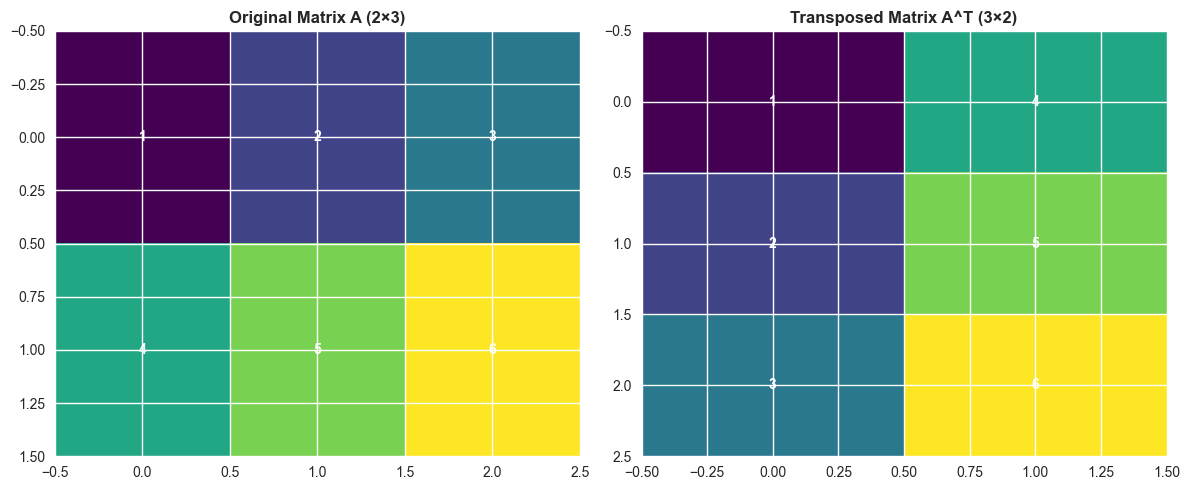

In [37]:
# Matrix transpose
A = np.array([[1, 2, 3],
              [4, 5, 6]])

A_T = A.T  # or np.transpose(A)

print("Matrix Transpose:")
print(f"A (2×3) =\n{A}")
print(f"\nA^T (3×2) =\n{A_T}")

# Verify properties
print("\nVerifying Properties:")
print(f"(A^T)^T = A? {np.array_equal((A.T).T, A)}")

# For square matrices
B = np.array([[1, 2], [3, 4]])
C = np.array([[5, 6], [7, 8]])

BC = B @ C
BC_T = BC.T
CT_BT = C.T @ B.T

print(f"(BC)^T = C^T B^T? {np.array_equal(BC_T, CT_BT)}")

# Visualize transpose operation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original matrix
im1 = ax1.imshow(A, cmap='viridis', aspect='auto')
ax1.set_title('Original Matrix A (2×3)', fontweight='bold')
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        ax1.text(j, i, str(A[i, j]), ha='center', va='center', color='white', fontweight='bold')

# Transposed matrix
im2 = ax2.imshow(A_T, cmap='viridis', aspect='auto')
ax2.set_title('Transposed Matrix A^T (3×2)', fontweight='bold')
for i in range(A_T.shape[0]):
    for j in range(A_T.shape[1]):
        ax2.text(j, i, str(A_T[i, j]), ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### 4. Matrix Inverse
**Definition**: For square matrix A, if A⁻¹ exists:
$$A \cdot A^{-1} = A^{-1} \cdot A = I$$

**Conditions for Existence**:
- Matrix must be **square**
- Matrix must be **non-singular** (det(A) ≠ 0)

**ML Applications**: Solving linear equations, pseudo-inverse for regression

In [38]:
# Matrix inverse
A = np.array([[2, 1],
              [1, 1]], dtype=float)

# Check if matrix is invertible (determinant ≠ 0)
det_A = np.linalg.det(A)
print(f"Matrix A =\n{A}")
print(f"\nDeterminant of A: {det_A:.3f}")

if abs(det_A) > 1e-10:  # Check for numerical stability
    A_inv = np.linalg.inv(A)
    print(f"\nA^(-1) =\n{A_inv}")
    
    # Verify A * A^(-1) = I
    identity_check = A @ A_inv
    print(f"\nA × A^(-1) =\n{identity_check}")
    print(f"\nIs it identity? {np.allclose(identity_check, np.eye(2))}")
    
    # Solve linear system Ax = b using inverse
    b = np.array([5, 3])
    x_inv = A_inv @ b
    x_solve = np.linalg.solve(A, b)  # More numerically stable
    
    print(f"\nSolving Ax = b where b = {b}:")
    print(f"Using inverse: x = {x_inv}")
    print(f"Using solve:   x = {x_solve}")
    print(f"Verification Ax = {A @ x_solve}")
else:
    print("\nMatrix is singular (not invertible)!")

# Example of singular matrix
print("\n" + "="*40)
print("EXAMPLE OF SINGULAR MATRIX")
print("="*40)

singular_matrix = np.array([[1, 2],
                           [2, 4]])
det_singular = np.linalg.det(singular_matrix)
print(f"Singular matrix =\n{singular_matrix}")
print(f"Determinant: {det_singular:.3f}")
print("This matrix is not invertible because its rows are linearly dependent.")

Matrix A =
[[2. 1.]
 [1. 1.]]

Determinant of A: 1.000

A^(-1) =
[[ 1. -1.]
 [-1.  2.]]

A × A^(-1) =
[[1. 0.]
 [0. 1.]]

Is it identity? True

Solving Ax = b where b = [5 3]:
Using inverse: x = [2. 1.]
Using solve:   x = [2. 1.]
Verification Ax = [5. 3.]

EXAMPLE OF SINGULAR MATRIX
Singular matrix =
[[1 2]
 [2 4]]
Determinant: 0.000
This matrix is not invertible because its rows are linearly dependent.


### 5. Determinant
**Definition**: A scalar value that characterizes the matrix

**2×2 Matrix**:
$$\det(A) = \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc$$

**Geometric Interpretation**:
- **Area scaling factor** for 2D transformations
- **Volume scaling factor** for 3D transformations
- **Zero determinant** = matrix collapses space to lower dimension

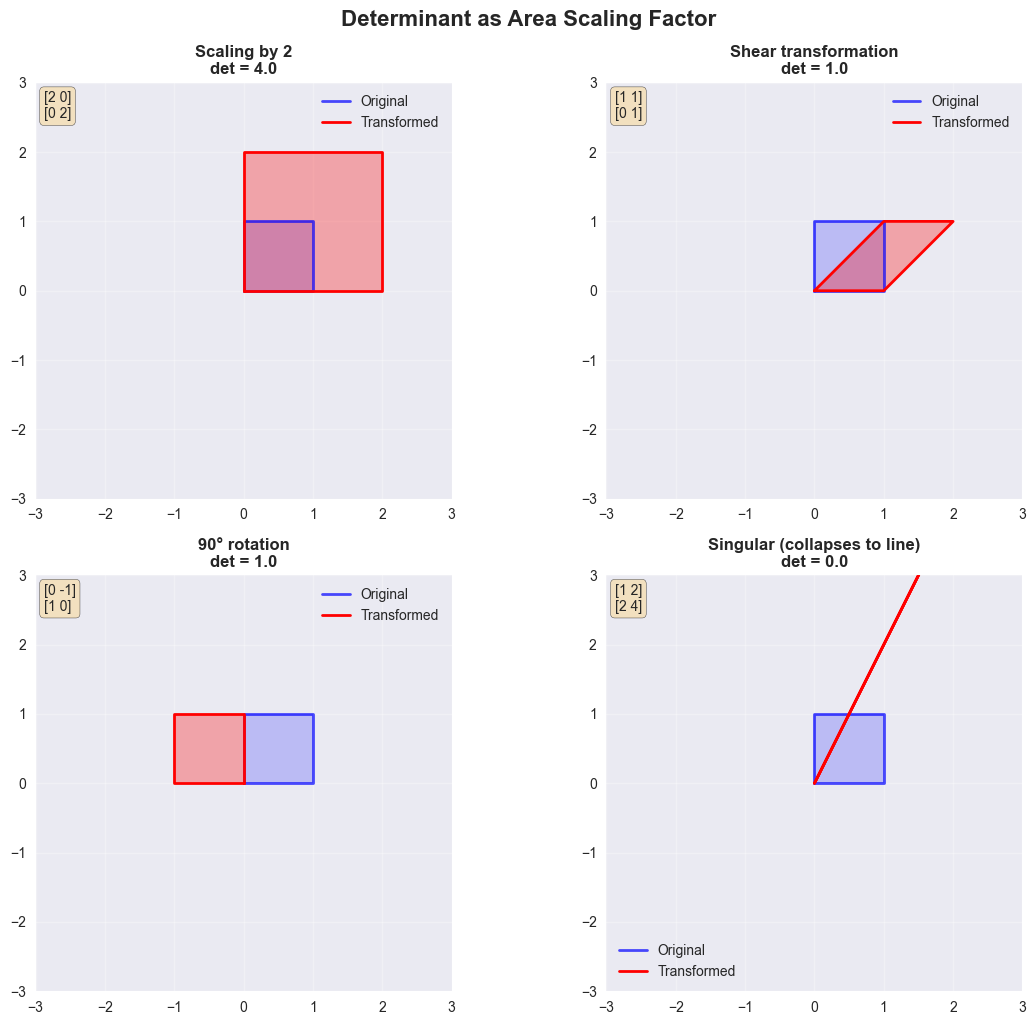

Determinant Properties:
det(A) = 5.000
det(B) = -5.000
det(AB) = -25.000
det(A) × det(B) = -25.000
det(A^T) = 5.000

Property checks:
det(AB) = det(A) × det(B)? True
det(A^T) = det(A)? True


In [39]:
# Determinant and its geometric interpretation
matrices = [
    (np.array([[2, 0], [0, 2]]), "Scaling by 2"),
    (np.array([[1, 1], [0, 1]]), "Shear transformation"),
    (np.array([[0, -1], [1, 0]]), "90° rotation"),
    (np.array([[1, 2], [2, 4]]), "Singular (collapses to line)")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Unit square vertices
unit_square = np.array([[0, 1, 1, 0, 0],
                       [0, 0, 1, 1, 0]])

for i, (matrix, title) in enumerate(matrices):
    # Transform unit square
    transformed = matrix @ unit_square
    
    # Calculate determinant
    det = np.linalg.det(matrix)
    
    # Plot
    axes[i].plot(unit_square[0], unit_square[1], 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[i].fill(unit_square[0], unit_square[1], 'blue', alpha=0.2)
    
    axes[i].plot(transformed[0], transformed[1], 'r-', linewidth=2, label='Transformed')
    axes[i].fill(transformed[0], transformed[1], 'red', alpha=0.3)
    
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_aspect('equal')
    axes[i].legend()
    axes[i].set_title(f'{title}\ndet = {det:.1f}', fontweight='bold')
    
    # Add matrix text
    matrix_str = f'[{matrix[0,0]:.0f} {matrix[0,1]:.0f}]\n[{matrix[1,0]:.0f} {matrix[1,1]:.0f}]'
    axes[i].text(0.02, 0.98, matrix_str, transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.suptitle('Determinant as Area Scaling Factor', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Properties of determinant
print("Determinant Properties:")
A = np.array([[2, 3], [1, 4]])
B = np.array([[1, 2], [3, 1]])

det_A = np.linalg.det(A)
det_B = np.linalg.det(B)
det_AB = np.linalg.det(A @ B)
det_AT = np.linalg.det(A.T)

print(f"det(A) = {det_A:.3f}")
print(f"det(B) = {det_B:.3f}")
print(f"det(AB) = {det_AB:.3f}")
print(f"det(A) × det(B) = {det_A * det_B:.3f}")
print(f"det(A^T) = {det_AT:.3f}")
print(f"\nProperty checks:")
print(f"det(AB) = det(A) × det(B)? {np.isclose(det_AB, det_A * det_B)}")
print(f"det(A^T) = det(A)? {np.isclose(det_AT, det_A)}")

# Linear Algebra Fundamentals for Machine Learning

This notebook covers the essential linear algebra concepts needed for ML/AI:
1. **Vectors**: Operations, dot product, cross product, norms
2. **Matrices**: Multiplication, transpose, inverse, determinant
3. **Eigenvalues/Eigenvectors**: Principal components, dimensionality reduction
4. **Vector Spaces**: Basis, linear independence, span

## Why Linear Algebra Matters in ML
- **90% of ML algorithms** rely on matrix operations
- **Data representation**: Images, text, features are all vectors/matrices
- **Transformations**: Rotations, scaling, projections
- **Dimensionality reduction**: PCA, SVD
- **Neural networks**: Weight matrices, forward/backward propagation

In [40]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

📚 Libraries imported successfully!
NumPy version: 2.1.3


# 1. Vectors: The Building Blocks

## What is a Vector?
A vector is an ordered list of numbers that represents:
- **Geometric**: Direction and magnitude in space
- **Algebraic**: A point in n-dimensional space
- **ML Context**: Features of a data point

### Vector Representation
$$\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Column vectors:
v1 = 
[[3]
 [4]]
v2 = 
[[1]
 [2]]

Row vectors:
v1 = [3 4]
v2 = [1 2]


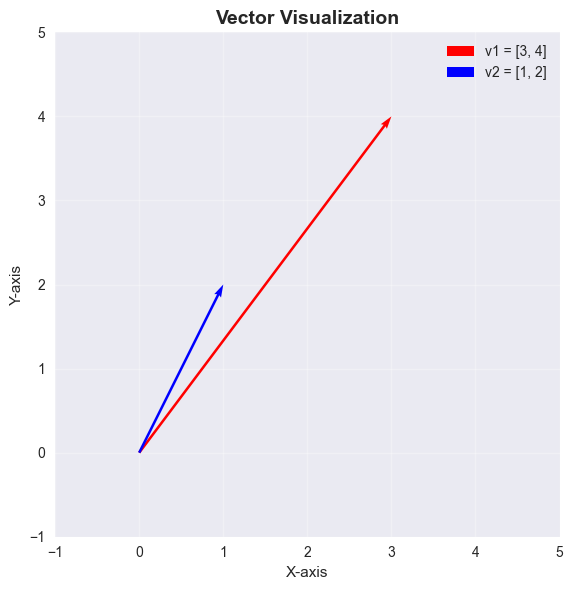

In [41]:
# Creating vectors in NumPy
# Column vector (most common in ML)
v1 = np.array([[3], [4]])  # 2D vector
v2 = np.array([[1], [2]]) 

# Row vector
v1_row = np.array([3, 4])
v2_row = np.array([1, 2])

print("Column vectors:")
print(f"v1 = \n{v1}")
print(f"v2 = \n{v2}")

print("\nRow vectors:")
print(f"v1 = {v1_row}")
print(f"v2 = {v2_row}")

# Visualizing vectors
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vectors from origin
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='v2 = [1, 2]')

# Add grid and formatting
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Visualization', fontsize=14, fontweight='bold')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.tight_layout()
plt.show()

## Vector Operations

### 1. Vector Addition
$$\vec{u} + \vec{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$

**Geometric Interpretation**: Placing vectors head-to-tail

v1 + v2 = [3 4] + [1 2] = [4 6]


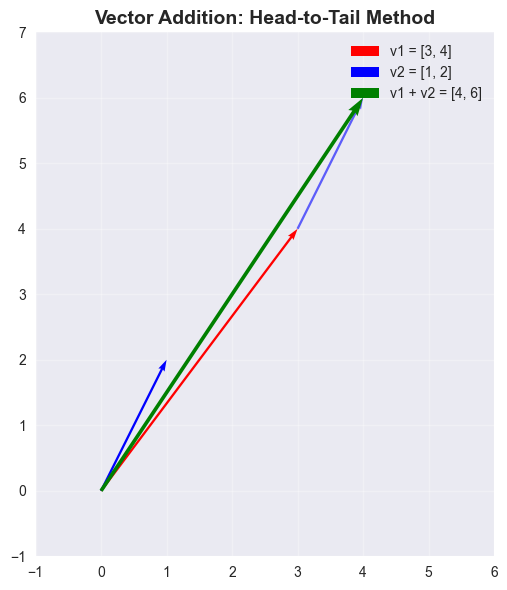

In [42]:
# Vector addition
v_sum = v1_row + v2_row
print(f"v1 + v2 = {v1_row} + {v2_row} = {v_sum}")

# Visualize vector addition
fig, ax = plt.subplots(figsize=(10, 6))

# Original vectors
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label='v1 = [3, 4]')
ax.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, label='v2 = [1, 2]')

# Vector addition (head-to-tail)
ax.quiver(v1_row[0], v1_row[1], v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.005, alpha=0.6, linestyle='--')

# Resultant vector
ax.quiver(0, 0, v_sum[0], v_sum[1], angles='xy', scale_units='xy', scale=1, 
          color='green', width=0.008, label=f'v1 + v2 = [{v_sum[0]}, {v_sum[1]}]')

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Vector Addition: Head-to-Tail Method', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2. Scalar Multiplication
$$c \cdot \vec{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \\ \vdots \\ c \cdot v_n \end{bmatrix}$$

**Geometric Interpretation**: Scaling the vector (magnitude) without changing direction

2.5 * v1 = 2.5 * [3 4] = [ 7.5 10. ]


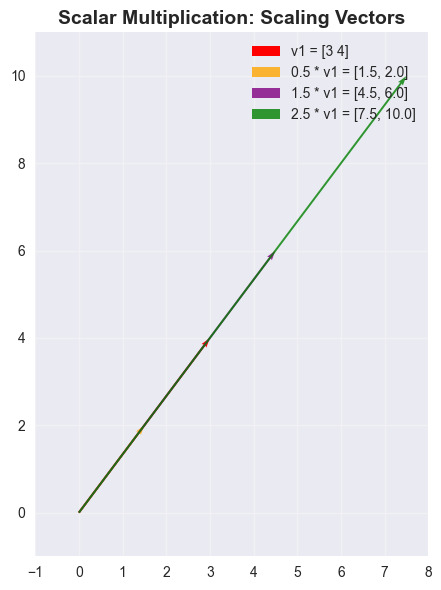

In [43]:
# Scalar multiplication
scalar = 2.5
v_scaled = scalar * v1_row
print(f"{scalar} * v1 = {scalar} * {v1_row} = {v_scaled}")

# Visualize scalar multiplication
fig, ax = plt.subplots(figsize=(10, 6))

# Original vector
ax.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.005, label=f'v1 = {v1_row}')

# Scaled vectors
for s, color in [(0.5, 'orange'), (1.5, 'purple'), (2.5, 'green')]:
    v_s = s * v1_row
    ax.quiver(0, 0, v_s[0], v_s[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.005, alpha=0.8, label=f'{s} * v1 = [{v_s[0]:.1f}, {v_s[1]:.1f}]')

ax.set_xlim(-1, 8)
ax.set_ylim(-1, 11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
ax.set_title('Scalar Multiplication: Scaling Vectors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3. Dot Product (Inner Product)
$$\vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n = |\vec{u}||\vec{v}|\cos(\theta)$$

**Key Properties**:
- Returns a **scalar** (not a vector)
- Measures **similarity** between vectors
- Related to the **angle** between vectors
- **Zero** when vectors are perpendicular

v1 · v2 = [3 4] · [1 2] = 3*1 + 4*2 = 11

Magnitudes:
|v1| = 5.000
|v2| = 2.236

Angle between vectors: 10.30°


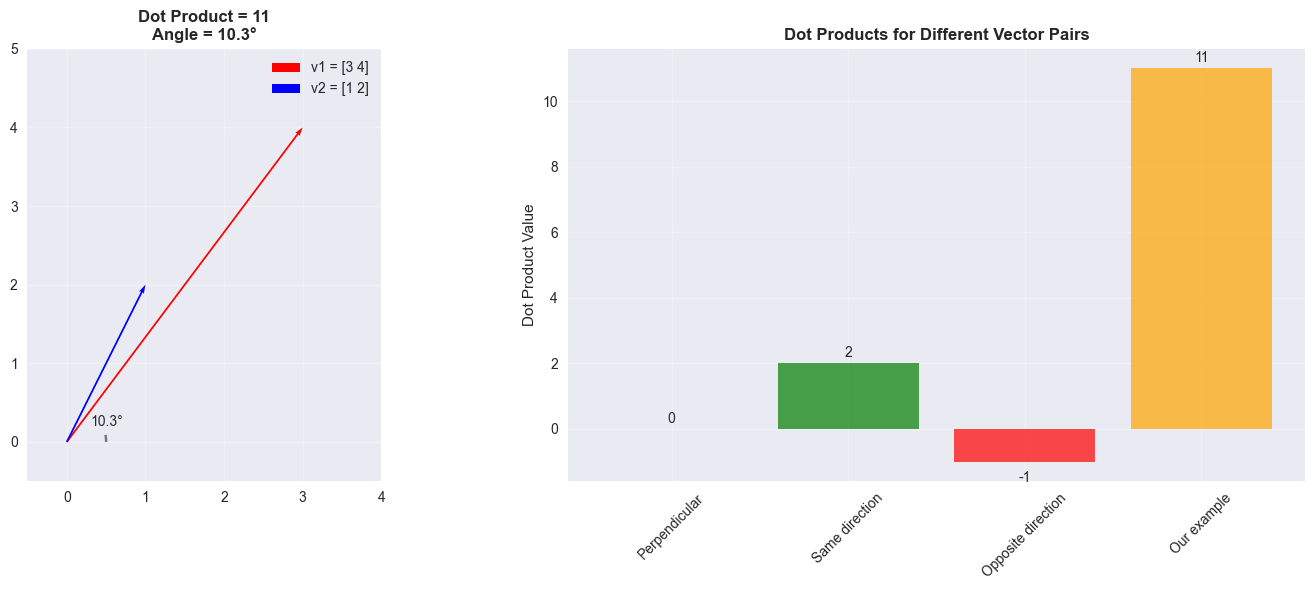

In [44]:
# Dot product calculation
dot_product = np.dot(v1_row, v2_row)
print(f"v1 · v2 = {v1_row} · {v2_row} = {v1_row[0]}*{v2_row[0]} + {v1_row[1]}*{v2_row[1]} = {dot_product}")

# Calculate angle between vectors
magnitude_v1 = np.linalg.norm(v1_row)
magnitude_v2 = np.linalg.norm(v2_row)
cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
angle_radians = np.arccos(cos_theta)
angle_degrees = np.degrees(angle_radians)

print(f"\nMagnitudes:")
print(f"|v1| = {magnitude_v1:.3f}")
print(f"|v2| = {magnitude_v2:.3f}")
print(f"\nAngle between vectors: {angle_degrees:.2f}°")

# Visualize dot product interpretation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Vectors and angle
ax1.quiver(0, 0, v1_row[0], v1_row[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, label=f'v1 = {v1_row}')
ax1.quiver(0, 0, v2_row[0], v2_row[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.005, label=f'v2 = {v2_row}')

# Draw angle arc
theta_range = np.linspace(0, angle_radians, 50)
arc_x = 0.5 * np.cos(theta_range)
arc_y = 0.5 * np.sin(theta_range)
ax1.plot(arc_x, arc_y, 'k--', alpha=0.5)
ax1.text(0.3, 0.2, f'{angle_degrees:.1f}°', fontsize=10)

ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 5)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.legend()
ax1.set_title(f'Dot Product = {dot_product}\nAngle = {angle_degrees:.1f}°', fontweight='bold')

# Right plot: Different vector pairs and their dot products
test_vectors = [
    ([1, 0], [0, 1], 'Perpendicular'),
    ([1, 1], [1, 1], 'Same direction'),
    ([1, 0], [-1, 0], 'Opposite direction'),
    ([3, 4], [1, 2], 'Our example')
]

colors = ['purple', 'green', 'red', 'orange']
dot_products = []
labels = []

for i, (u, v, desc) in enumerate(test_vectors):
    dot = np.dot(u, v)
    dot_products.append(dot)
    labels.append(f'{desc}\n{u}·{v}={dot}')

bars = ax2.bar(range(len(dot_products)), dot_products, color=colors, alpha=0.7)
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels([label.split('\n')[0] for label in labels], rotation=45)
ax2.set_ylabel('Dot Product Value')
ax2.set_title('Dot Products for Different Vector Pairs', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, dp in zip(bars, dot_products):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height >= 0 else height - 0.3,
             f'{dp}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

### 4. Cross Product (3D Only)
$$\vec{u} \times \vec{v} = \begin{bmatrix} u_2v_3 - u_3v_2 \\ u_3v_1 - u_1v_3 \\ u_1v_2 - u_2v_1 \end{bmatrix}$$

**Key Properties**:
- Returns a **vector** perpendicular to both input vectors
- Magnitude = area of parallelogram formed by the vectors